In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import learning_curve

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
dataset

Number of atoms  Relative number of N  atoms  \
Structure                                                 
"1Co"                  101                       0.0297   
"2Co"                  107                       0.0280   
"3Co"                  113                       0.0265   
"4Co"                  104                       0.0288   
"5Co"                  110                       0.0273   
...                    ...                          ...   
"1052Co"                86                       0.0349   
"1053Co"                74                       0.0405   
"1054Co"                80                       0.0375   
"1055Co"                86                       0.0349   
"1056Co"                77                       0.0390   

           Relative number of Cl atoms  Wiener index  \
Structure                                              
"1Co"                           0.0198         26631   
"2Co"                           0.0187         29652   
"3Co"                           0.0177         32339   
"4Co"                           0.0192         28065   
"5Co"                           0.0182         31138   
...                                ...           ...   
"1052Co"                        0.0233         17187   
"1053Co"                        0.0270         13291   
"1054Co"                        0.0250         15195   
"1055Co"                        0.0233         17187   
"1056Co"                        0.0260         14257   

           Kier&Hall index (order 3)  Average Information content (order 0)  \
Structure                                                                     
"1Co"                         9.9558                                 1.6397   
"2Co"                        10.4813                                 1.6785   
"3Co"                        10.8588                                 1.6722   
"4Co"                        10.1517                                 1.6509   
"5Co"                        10.6903                                 1.6850   
...                              ...                                    ...   
"1052Co"                      8.0898                                 1.7691   
"1053Co"                      7.1869                                 1.7552   
"1054Co"                      7.7123                                 1.7671   
"1055Co"                      8.0898                                 1.7691   
"1056Co"                      7.3828                                 1.7627   

           Balaban index  Max partial charge for a N  atom [Zefirov's PC]  \
Structure                                                                   
"1Co"             0.8438                                          -0.0893   
"2Co"             0.9663                                          -0.0893   
"3Co"             0.8453                                          -0.0892   
"4Co"             0.8427                                          -0.0893   
"5Co"             0.9670                                          -0.0893   
...                  ...                                              ...   
"1052Co"          0.9049                                          -0.0892   
"1053Co"          0.8931                                          -0.0893   
"1054Co"          0.8967                                          -0.0893   
"1055Co"          0.9049                                          -0.0892   
"1056Co"          0.8938                                          -0.0893   

           Min partial charge for a N  atom [Zefirov's PC]  \
Structure                                                    
"1Co"                                              -0.0926   
"2Co"                                              -0.0924   
"3Co"                                              -0.0923   
"4Co"                                              -0.0926   
"5Co"                                              -0.0924   
...                                               

In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [9]:
x_test.shape

(212, 29)

In [10]:
x_train.shape

(844, 29)

In [11]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [12]:
regressor = cb.CatBoostRegressor(depth=8, learning_rate = 0.1,l2_leaf_reg = 3, loss_function='RMSE',
                                 iterations=1000)

In [13]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [14]:
regressor.fit(train_dataset)

0:	learn: 0.4619270	total: 162ms	remaining: 2m 42s
1:	learn: 0.4459094	total: 184ms	remaining: 1m 32s
2:	learn: 0.4304716	total: 206ms	remaining: 1m 8s
3:	learn: 0.4136563	total: 232ms	remaining: 57.8s
4:	learn: 0.4010398	total: 254ms	remaining: 50.5s
5:	learn: 0.3882465	total: 276ms	remaining: 45.7s
6:	learn: 0.3777918	total: 298ms	remaining: 42.3s
7:	learn: 0.3671684	total: 318ms	remaining: 39.5s
8:	learn: 0.3591872	total: 341ms	remaining: 37.5s
9:	learn: 0.3531076	total: 362ms	remaining: 35.8s
10:	learn: 0.3453521	total: 399ms	remaining: 35.9s
11:	learn: 0.3392027	total: 426ms	remaining: 35.1s
12:	learn: 0.3315906	total: 448ms	remaining: 34s
13:	learn: 0.3245489	total: 469ms	remaining: 33s
14:	learn: 0.3190779	total: 490ms	remaining: 32.2s
15:	learn: 0.3141040	total: 514ms	remaining: 31.6s
16:	learn: 0.3092818	total: 536ms	remaining: 31s
17:	learn: 0.3039065	total: 561ms	remaining: 30.6s
18:	learn: 0.2994424	total: 583ms	remaining: 30.1s
19:	learn: 0.2949394	total: 613ms	remaining: 

164:	learn: 0.1006724	total: 5.36s	remaining: 27.1s
165:	learn: 0.1002694	total: 5.4s	remaining: 27.1s
166:	learn: 0.0995967	total: 5.43s	remaining: 27.1s
167:	learn: 0.0985221	total: 5.46s	remaining: 27s
168:	learn: 0.0978337	total: 5.49s	remaining: 27s
169:	learn: 0.0970358	total: 5.52s	remaining: 27s
170:	learn: 0.0965868	total: 5.55s	remaining: 26.9s
171:	learn: 0.0959297	total: 5.6s	remaining: 27s
172:	learn: 0.0957599	total: 5.64s	remaining: 27s
173:	learn: 0.0956442	total: 5.67s	remaining: 26.9s
174:	learn: 0.0952124	total: 5.7s	remaining: 26.9s
175:	learn: 0.0946349	total: 5.73s	remaining: 26.8s
176:	learn: 0.0939265	total: 5.75s	remaining: 26.8s
177:	learn: 0.0931834	total: 5.78s	remaining: 26.7s
178:	learn: 0.0926514	total: 5.82s	remaining: 26.7s
179:	learn: 0.0925442	total: 5.84s	remaining: 26.6s
180:	learn: 0.0920209	total: 5.87s	remaining: 26.6s
181:	learn: 0.0917111	total: 5.9s	remaining: 26.5s
182:	learn: 0.0909913	total: 5.93s	remaining: 26.5s
183:	learn: 0.0907600	tota

325:	learn: 0.0445430	total: 10.1s	remaining: 20.8s
326:	learn: 0.0443315	total: 10.1s	remaining: 20.8s
327:	learn: 0.0440854	total: 10.1s	remaining: 20.7s
328:	learn: 0.0437574	total: 10.1s	remaining: 20.7s
329:	learn: 0.0435762	total: 10.2s	remaining: 20.7s
330:	learn: 0.0433877	total: 10.2s	remaining: 20.6s
331:	learn: 0.0430510	total: 10.2s	remaining: 20.6s
332:	learn: 0.0427638	total: 10.3s	remaining: 20.6s
333:	learn: 0.0425411	total: 10.3s	remaining: 20.5s
334:	learn: 0.0425223	total: 10.3s	remaining: 20.5s
335:	learn: 0.0423346	total: 10.3s	remaining: 20.5s
336:	learn: 0.0422094	total: 10.4s	remaining: 20.4s
337:	learn: 0.0421459	total: 10.4s	remaining: 20.4s
338:	learn: 0.0418757	total: 10.4s	remaining: 20.3s
339:	learn: 0.0416825	total: 10.5s	remaining: 20.3s
340:	learn: 0.0414928	total: 10.5s	remaining: 20.2s
341:	learn: 0.0414271	total: 10.5s	remaining: 20.2s
342:	learn: 0.0413218	total: 10.5s	remaining: 20.2s
343:	learn: 0.0409773	total: 10.6s	remaining: 20.1s
344:	learn: 

489:	learn: 0.0224081	total: 15s	remaining: 15.7s
490:	learn: 0.0223531	total: 15.1s	remaining: 15.6s
491:	learn: 0.0222960	total: 15.1s	remaining: 15.6s
492:	learn: 0.0222243	total: 15.1s	remaining: 15.6s
493:	learn: 0.0221681	total: 15.2s	remaining: 15.5s
494:	learn: 0.0221389	total: 15.2s	remaining: 15.5s
495:	learn: 0.0220885	total: 15.2s	remaining: 15.5s
496:	learn: 0.0220231	total: 15.3s	remaining: 15.5s
497:	learn: 0.0218810	total: 15.3s	remaining: 15.4s
498:	learn: 0.0218207	total: 15.3s	remaining: 15.4s
499:	learn: 0.0217425	total: 15.4s	remaining: 15.4s
500:	learn: 0.0217238	total: 15.4s	remaining: 15.3s
501:	learn: 0.0217042	total: 15.4s	remaining: 15.3s
502:	learn: 0.0216572	total: 15.4s	remaining: 15.2s
503:	learn: 0.0215595	total: 15.5s	remaining: 15.2s
504:	learn: 0.0215197	total: 15.5s	remaining: 15.2s
505:	learn: 0.0214554	total: 15.5s	remaining: 15.2s
506:	learn: 0.0213629	total: 15.6s	remaining: 15.1s
507:	learn: 0.0212911	total: 15.6s	remaining: 15.1s
508:	learn: 0.

650:	learn: 0.0140193	total: 19.6s	remaining: 10.5s
651:	learn: 0.0139704	total: 19.6s	remaining: 10.5s
652:	learn: 0.0139660	total: 19.7s	remaining: 10.5s
653:	learn: 0.0139239	total: 19.7s	remaining: 10.4s
654:	learn: 0.0139070	total: 19.8s	remaining: 10.4s
655:	learn: 0.0138709	total: 19.8s	remaining: 10.4s
656:	learn: 0.0138545	total: 19.8s	remaining: 10.3s
657:	learn: 0.0138384	total: 19.8s	remaining: 10.3s
658:	learn: 0.0137842	total: 19.9s	remaining: 10.3s
659:	learn: 0.0137553	total: 19.9s	remaining: 10.2s
660:	learn: 0.0137338	total: 19.9s	remaining: 10.2s
661:	learn: 0.0136589	total: 19.9s	remaining: 10.2s
662:	learn: 0.0136467	total: 19.9s	remaining: 10.1s
663:	learn: 0.0135998	total: 20s	remaining: 10.1s
664:	learn: 0.0135756	total: 20s	remaining: 10.1s
665:	learn: 0.0135201	total: 20s	remaining: 10s
666:	learn: 0.0135098	total: 20s	remaining: 10s
667:	learn: 0.0135049	total: 20.1s	remaining: 9.97s
668:	learn: 0.0135025	total: 20.1s	remaining: 9.92s
669:	learn: 0.0134669	to

810:	learn: 0.0103890	total: 24s	remaining: 5.58s
811:	learn: 0.0103759	total: 24s	remaining: 5.55s
812:	learn: 0.0103600	total: 24s	remaining: 5.52s
813:	learn: 0.0103467	total: 24s	remaining: 5.49s
814:	learn: 0.0103278	total: 24.1s	remaining: 5.46s
815:	learn: 0.0103153	total: 24.1s	remaining: 5.43s
816:	learn: 0.0102929	total: 24.1s	remaining: 5.4s
817:	learn: 0.0102908	total: 24.1s	remaining: 5.37s
818:	learn: 0.0102834	total: 24.2s	remaining: 5.34s
819:	learn: 0.0102824	total: 24.2s	remaining: 5.31s
820:	learn: 0.0102673	total: 24.2s	remaining: 5.28s
821:	learn: 0.0102403	total: 24.3s	remaining: 5.25s
822:	learn: 0.0102307	total: 24.3s	remaining: 5.22s
823:	learn: 0.0102216	total: 24.3s	remaining: 5.19s
824:	learn: 0.0102118	total: 24.3s	remaining: 5.16s
825:	learn: 0.0101997	total: 24.4s	remaining: 5.13s
826:	learn: 0.0101902	total: 24.4s	remaining: 5.1s
827:	learn: 0.0101788	total: 24.4s	remaining: 5.07s
828:	learn: 0.0101774	total: 24.4s	remaining: 5.04s
829:	learn: 0.0101698	

973:	learn: 0.0089178	total: 28.4s	remaining: 757ms
974:	learn: 0.0089105	total: 28.4s	remaining: 728ms
975:	learn: 0.0089014	total: 28.4s	remaining: 699ms
976:	learn: 0.0088951	total: 28.4s	remaining: 670ms
977:	learn: 0.0088846	total: 28.5s	remaining: 640ms
978:	learn: 0.0088768	total: 28.5s	remaining: 611ms
979:	learn: 0.0088752	total: 28.5s	remaining: 582ms
980:	learn: 0.0088705	total: 28.5s	remaining: 553ms
981:	learn: 0.0088625	total: 28.6s	remaining: 524ms
982:	learn: 0.0088570	total: 28.6s	remaining: 495ms
983:	learn: 0.0088517	total: 28.6s	remaining: 465ms
984:	learn: 0.0088467	total: 28.6s	remaining: 436ms
985:	learn: 0.0088419	total: 28.7s	remaining: 407ms
986:	learn: 0.0088415	total: 28.7s	remaining: 378ms
987:	learn: 0.0088378	total: 28.7s	remaining: 349ms
988:	learn: 0.0088300	total: 28.7s	remaining: 320ms
989:	learn: 0.0088235	total: 28.8s	remaining: 290ms
990:	learn: 0.0088175	total: 28.8s	remaining: 261ms
991:	learn: 0.0088122	total: 28.8s	remaining: 232ms
992:	learn: 

In [15]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:29.640000


In [16]:
# To know the learning rate 
print("Learning rate: ", regressor.learning_rate_)

Learning rate:  0.10000000149011612


In [17]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [18]:
y_pred_train = regressor.predict(x_train)

In [19]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [20]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [21]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.14418257767877313
MSE is 0.04337478977825152
R2 score is 0.8338643654511465


In [22]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [23]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.0031030219980917365
MSE is 7.696190785875361e-05
R2 score is 0.9996667520333224


In [24]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

0:	learn: 0.4701165	total: 33.8ms	remaining: 33.7s
1:	learn: 0.4540595	total: 72.6ms	remaining: 36.2s
2:	learn: 0.4393889	total: 110ms	remaining: 36.6s
3:	learn: 0.4230607	total: 149ms	remaining: 37.1s
4:	learn: 0.4103808	total: 187ms	remaining: 37.2s
5:	learn: 0.4000346	total: 219ms	remaining: 36.2s
6:	learn: 0.3894729	total: 265ms	remaining: 37.6s
7:	learn: 0.3795497	total: 296ms	remaining: 36.7s
8:	learn: 0.3723463	total: 327ms	remaining: 36s
9:	learn: 0.3631357	total: 359ms	remaining: 35.6s
10:	learn: 0.3539189	total: 390ms	remaining: 35s
11:	learn: 0.3473158	total: 420ms	remaining: 34.6s
12:	learn: 0.3392223	total: 450ms	remaining: 34.1s
13:	learn: 0.3318623	total: 493ms	remaining: 34.7s
14:	learn: 0.3271689	total: 525ms	remaining: 34.5s
15:	learn: 0.3208621	total: 557ms	remaining: 34.3s
16:	learn: 0.3155370	total: 589ms	remaining: 34s
17:	learn: 0.3098398	total: 625ms	remaining: 34.1s
18:	learn: 0.3066052	total: 655ms	remaining: 33.8s
19:	learn: 0.3016920	total: 693ms	remaining: 

167:	learn: 0.1005931	total: 5.21s	remaining: 25.8s
168:	learn: 0.0999439	total: 5.24s	remaining: 25.8s
169:	learn: 0.0996084	total: 5.26s	remaining: 25.7s
170:	learn: 0.0984956	total: 5.29s	remaining: 25.6s
171:	learn: 0.0978354	total: 5.31s	remaining: 25.6s
172:	learn: 0.0974918	total: 5.33s	remaining: 25.5s
173:	learn: 0.0972878	total: 5.36s	remaining: 25.4s
174:	learn: 0.0962017	total: 5.38s	remaining: 25.4s
175:	learn: 0.0954078	total: 5.42s	remaining: 25.4s
176:	learn: 0.0952932	total: 5.45s	remaining: 25.4s
177:	learn: 0.0950584	total: 5.48s	remaining: 25.3s
178:	learn: 0.0942789	total: 5.51s	remaining: 25.3s
179:	learn: 0.0941725	total: 5.53s	remaining: 25.2s
180:	learn: 0.0935143	total: 5.55s	remaining: 25.1s
181:	learn: 0.0931702	total: 5.59s	remaining: 25.1s
182:	learn: 0.0930288	total: 5.62s	remaining: 25.1s
183:	learn: 0.0924900	total: 5.66s	remaining: 25.1s
184:	learn: 0.0923244	total: 5.69s	remaining: 25.1s
185:	learn: 0.0917976	total: 5.73s	remaining: 25.1s
186:	learn: 

332:	learn: 0.0403525	total: 9.76s	remaining: 19.6s
333:	learn: 0.0401845	total: 9.79s	remaining: 19.5s
334:	learn: 0.0401272	total: 9.81s	remaining: 19.5s
335:	learn: 0.0399850	total: 9.84s	remaining: 19.4s
336:	learn: 0.0397425	total: 9.86s	remaining: 19.4s
337:	learn: 0.0396044	total: 9.89s	remaining: 19.4s
338:	learn: 0.0392397	total: 9.91s	remaining: 19.3s
339:	learn: 0.0391647	total: 9.94s	remaining: 19.3s
340:	learn: 0.0389400	total: 9.97s	remaining: 19.3s
341:	learn: 0.0386664	total: 10s	remaining: 19.3s
342:	learn: 0.0384364	total: 10s	remaining: 19.2s
343:	learn: 0.0381933	total: 10.1s	remaining: 19.2s
344:	learn: 0.0379846	total: 10.1s	remaining: 19.2s
345:	learn: 0.0379159	total: 10.1s	remaining: 19.1s
346:	learn: 0.0377511	total: 10.1s	remaining: 19.1s
347:	learn: 0.0375413	total: 10.2s	remaining: 19s
348:	learn: 0.0375186	total: 10.2s	remaining: 19s
349:	learn: 0.0374493	total: 10.2s	remaining: 19s
350:	learn: 0.0374300	total: 10.2s	remaining: 18.9s
351:	learn: 0.0372992	

495:	learn: 0.0178052	total: 14.5s	remaining: 14.7s
496:	learn: 0.0177063	total: 14.5s	remaining: 14.7s
497:	learn: 0.0175707	total: 14.6s	remaining: 14.7s
498:	learn: 0.0174705	total: 14.6s	remaining: 14.7s
499:	learn: 0.0174441	total: 14.6s	remaining: 14.6s
500:	learn: 0.0173578	total: 14.7s	remaining: 14.6s
501:	learn: 0.0173360	total: 14.7s	remaining: 14.6s
502:	learn: 0.0172495	total: 14.7s	remaining: 14.5s
503:	learn: 0.0171232	total: 14.7s	remaining: 14.5s
504:	learn: 0.0169796	total: 14.8s	remaining: 14.5s
505:	learn: 0.0168519	total: 14.8s	remaining: 14.4s
506:	learn: 0.0168136	total: 14.8s	remaining: 14.4s
507:	learn: 0.0167325	total: 14.8s	remaining: 14.4s
508:	learn: 0.0166409	total: 14.9s	remaining: 14.3s
509:	learn: 0.0165855	total: 14.9s	remaining: 14.3s
510:	learn: 0.0164592	total: 14.9s	remaining: 14.3s
511:	learn: 0.0163622	total: 14.9s	remaining: 14.2s
512:	learn: 0.0162755	total: 15s	remaining: 14.2s
513:	learn: 0.0162517	total: 15s	remaining: 14.2s
514:	learn: 0.01

654:	learn: 0.0092171	total: 18.8s	remaining: 9.9s
655:	learn: 0.0091630	total: 18.8s	remaining: 9.87s
656:	learn: 0.0091155	total: 18.9s	remaining: 9.84s
657:	learn: 0.0090353	total: 18.9s	remaining: 9.81s
658:	learn: 0.0090176	total: 18.9s	remaining: 9.78s
659:	learn: 0.0089970	total: 18.9s	remaining: 9.76s
660:	learn: 0.0089592	total: 19s	remaining: 9.73s
661:	learn: 0.0089086	total: 19s	remaining: 9.7s
662:	learn: 0.0088911	total: 19s	remaining: 9.67s
663:	learn: 0.0088859	total: 19.1s	remaining: 9.64s
664:	learn: 0.0088547	total: 19.1s	remaining: 9.61s
665:	learn: 0.0088087	total: 19.1s	remaining: 9.58s
666:	learn: 0.0087830	total: 19.1s	remaining: 9.55s
667:	learn: 0.0087749	total: 19.1s	remaining: 9.52s
668:	learn: 0.0087206	total: 19.2s	remaining: 9.49s
669:	learn: 0.0086591	total: 19.2s	remaining: 9.46s
670:	learn: 0.0086071	total: 19.2s	remaining: 9.43s
671:	learn: 0.0085912	total: 19.3s	remaining: 9.4s
672:	learn: 0.0085894	total: 19.3s	remaining: 9.37s
673:	learn: 0.0085097

813:	learn: 0.0049725	total: 23s	remaining: 5.26s
814:	learn: 0.0049695	total: 23s	remaining: 5.23s
815:	learn: 0.0049577	total: 23.1s	remaining: 5.2s
816:	learn: 0.0049280	total: 23.1s	remaining: 5.17s
817:	learn: 0.0048997	total: 23.1s	remaining: 5.14s
818:	learn: 0.0048857	total: 23.1s	remaining: 5.12s
819:	learn: 0.0048699	total: 23.2s	remaining: 5.09s
820:	learn: 0.0048595	total: 23.2s	remaining: 5.06s
821:	learn: 0.0048492	total: 23.2s	remaining: 5.03s
822:	learn: 0.0048223	total: 23.3s	remaining: 5s
823:	learn: 0.0048077	total: 23.3s	remaining: 4.97s
824:	learn: 0.0047807	total: 23.3s	remaining: 4.94s
825:	learn: 0.0047730	total: 23.3s	remaining: 4.92s
826:	learn: 0.0047349	total: 23.4s	remaining: 4.89s
827:	learn: 0.0047180	total: 23.4s	remaining: 4.86s
828:	learn: 0.0046706	total: 23.4s	remaining: 4.83s
829:	learn: 0.0046489	total: 23.4s	remaining: 4.8s
830:	learn: 0.0046378	total: 23.5s	remaining: 4.77s
831:	learn: 0.0046164	total: 23.5s	remaining: 4.74s
832:	learn: 0.0046033

973:	learn: 0.0027701	total: 27.3s	remaining: 728ms
974:	learn: 0.0027634	total: 27.3s	remaining: 700ms
975:	learn: 0.0027537	total: 27.3s	remaining: 672ms
976:	learn: 0.0027484	total: 27.5s	remaining: 646ms
977:	learn: 0.0027327	total: 27.5s	remaining: 620ms
978:	learn: 0.0027299	total: 27.6s	remaining: 592ms
979:	learn: 0.0027249	total: 27.7s	remaining: 565ms
980:	learn: 0.0027112	total: 27.7s	remaining: 536ms
981:	learn: 0.0027018	total: 27.7s	remaining: 508ms
982:	learn: 0.0026909	total: 27.7s	remaining: 480ms
983:	learn: 0.0026833	total: 27.8s	remaining: 452ms
984:	learn: 0.0026621	total: 27.8s	remaining: 423ms
985:	learn: 0.0026414	total: 27.8s	remaining: 395ms
986:	learn: 0.0026344	total: 27.9s	remaining: 367ms
987:	learn: 0.0026251	total: 27.9s	remaining: 339ms
988:	learn: 0.0026119	total: 27.9s	remaining: 311ms
989:	learn: 0.0025982	total: 28s	remaining: 282ms
990:	learn: 0.0025808	total: 28s	remaining: 254ms
991:	learn: 0.0025775	total: 28s	remaining: 226ms
992:	learn: 0.0025

136:	learn: 0.1167888	total: 4.65s	remaining: 29.3s
137:	learn: 0.1152616	total: 4.68s	remaining: 29.3s
138:	learn: 0.1138631	total: 4.71s	remaining: 29.2s
139:	learn: 0.1133757	total: 4.74s	remaining: 29.1s
140:	learn: 0.1125450	total: 4.76s	remaining: 29s
141:	learn: 0.1116697	total: 4.79s	remaining: 29s
142:	learn: 0.1102651	total: 4.83s	remaining: 28.9s
143:	learn: 0.1088419	total: 4.86s	remaining: 28.9s
144:	learn: 0.1079359	total: 4.89s	remaining: 28.9s
145:	learn: 0.1072930	total: 4.92s	remaining: 28.8s
146:	learn: 0.1066161	total: 4.94s	remaining: 28.7s
147:	learn: 0.1053853	total: 4.97s	remaining: 28.6s
148:	learn: 0.1050376	total: 5s	remaining: 28.5s
149:	learn: 0.1048405	total: 5.02s	remaining: 28.5s
150:	learn: 0.1047766	total: 5.05s	remaining: 28.4s
151:	learn: 0.1042858	total: 5.07s	remaining: 28.3s
152:	learn: 0.1032820	total: 5.1s	remaining: 28.3s
153:	learn: 0.1031959	total: 5.13s	remaining: 28.2s
154:	learn: 0.1019965	total: 5.15s	remaining: 28.1s
155:	learn: 0.101558

300:	learn: 0.0436249	total: 9.19s	remaining: 21.3s
301:	learn: 0.0435513	total: 9.22s	remaining: 21.3s
302:	learn: 0.0435373	total: 9.25s	remaining: 21.3s
303:	learn: 0.0432486	total: 9.27s	remaining: 21.2s
304:	learn: 0.0432285	total: 9.3s	remaining: 21.2s
305:	learn: 0.0428862	total: 9.32s	remaining: 21.1s
306:	learn: 0.0425747	total: 9.35s	remaining: 21.1s
307:	learn: 0.0425402	total: 9.37s	remaining: 21.1s
308:	learn: 0.0422614	total: 9.41s	remaining: 21s
309:	learn: 0.0421534	total: 9.44s	remaining: 21s
310:	learn: 0.0418553	total: 9.47s	remaining: 21s
311:	learn: 0.0417414	total: 9.5s	remaining: 20.9s
312:	learn: 0.0414757	total: 9.52s	remaining: 20.9s
313:	learn: 0.0412336	total: 9.55s	remaining: 20.9s
314:	learn: 0.0410488	total: 9.57s	remaining: 20.8s
315:	learn: 0.0409941	total: 9.6s	remaining: 20.8s
316:	learn: 0.0409377	total: 9.63s	remaining: 20.8s
317:	learn: 0.0406723	total: 9.65s	remaining: 20.7s
318:	learn: 0.0403777	total: 9.68s	remaining: 20.7s
319:	learn: 0.0399754

462:	learn: 0.0218652	total: 13.6s	remaining: 15.8s
463:	learn: 0.0218081	total: 13.7s	remaining: 15.8s
464:	learn: 0.0217480	total: 13.7s	remaining: 15.7s
465:	learn: 0.0217418	total: 13.7s	remaining: 15.7s
466:	learn: 0.0216142	total: 13.7s	remaining: 15.7s
467:	learn: 0.0215219	total: 13.8s	remaining: 15.6s
468:	learn: 0.0213586	total: 13.8s	remaining: 15.6s
469:	learn: 0.0213013	total: 13.8s	remaining: 15.6s
470:	learn: 0.0212893	total: 13.9s	remaining: 15.6s
471:	learn: 0.0212169	total: 13.9s	remaining: 15.5s
472:	learn: 0.0211650	total: 13.9s	remaining: 15.5s
473:	learn: 0.0210430	total: 13.9s	remaining: 15.5s
474:	learn: 0.0209538	total: 14s	remaining: 15.4s
475:	learn: 0.0209493	total: 14s	remaining: 15.4s
476:	learn: 0.0209380	total: 14s	remaining: 15.4s
477:	learn: 0.0209300	total: 14s	remaining: 15.3s
478:	learn: 0.0208559	total: 14.1s	remaining: 15.3s
479:	learn: 0.0207173	total: 14.1s	remaining: 15.3s
480:	learn: 0.0206426	total: 14.1s	remaining: 15.2s
481:	learn: 0.020621

628:	learn: 0.0136543	total: 18.1s	remaining: 10.7s
629:	learn: 0.0136228	total: 18.1s	remaining: 10.6s
630:	learn: 0.0135873	total: 18.1s	remaining: 10.6s
631:	learn: 0.0135830	total: 18.2s	remaining: 10.6s
632:	learn: 0.0135460	total: 18.2s	remaining: 10.5s
633:	learn: 0.0135432	total: 18.2s	remaining: 10.5s
634:	learn: 0.0135391	total: 18.2s	remaining: 10.5s
635:	learn: 0.0134868	total: 18.3s	remaining: 10.5s
636:	learn: 0.0134785	total: 18.3s	remaining: 10.4s
637:	learn: 0.0134749	total: 18.3s	remaining: 10.4s
638:	learn: 0.0134413	total: 18.3s	remaining: 10.4s
639:	learn: 0.0133964	total: 18.4s	remaining: 10.3s
640:	learn: 0.0133801	total: 18.4s	remaining: 10.3s
641:	learn: 0.0133749	total: 18.4s	remaining: 10.3s
642:	learn: 0.0133719	total: 18.4s	remaining: 10.2s
643:	learn: 0.0133700	total: 18.5s	remaining: 10.2s
644:	learn: 0.0133386	total: 18.5s	remaining: 10.2s
645:	learn: 0.0133292	total: 18.5s	remaining: 10.1s
646:	learn: 0.0133031	total: 18.5s	remaining: 10.1s
647:	learn: 

793:	learn: 0.0104462	total: 22.6s	remaining: 5.86s
794:	learn: 0.0104405	total: 22.6s	remaining: 5.83s
795:	learn: 0.0104390	total: 22.6s	remaining: 5.8s
796:	learn: 0.0104210	total: 22.6s	remaining: 5.77s
797:	learn: 0.0104111	total: 22.7s	remaining: 5.74s
798:	learn: 0.0103995	total: 22.7s	remaining: 5.71s
799:	learn: 0.0103962	total: 22.7s	remaining: 5.68s
800:	learn: 0.0103876	total: 22.8s	remaining: 5.65s
801:	learn: 0.0103729	total: 22.8s	remaining: 5.63s
802:	learn: 0.0103581	total: 22.8s	remaining: 5.6s
803:	learn: 0.0103479	total: 22.8s	remaining: 5.57s
804:	learn: 0.0103330	total: 22.9s	remaining: 5.54s
805:	learn: 0.0103213	total: 22.9s	remaining: 5.51s
806:	learn: 0.0103111	total: 22.9s	remaining: 5.48s
807:	learn: 0.0103017	total: 22.9s	remaining: 5.45s
808:	learn: 0.0102997	total: 23s	remaining: 5.42s
809:	learn: 0.0102904	total: 23s	remaining: 5.39s
810:	learn: 0.0102757	total: 23s	remaining: 5.37s
811:	learn: 0.0102619	total: 23.1s	remaining: 5.34s
812:	learn: 0.010259

958:	learn: 0.0094530	total: 27s	remaining: 1.16s
959:	learn: 0.0094493	total: 27s	remaining: 1.13s
960:	learn: 0.0094484	total: 27.1s	remaining: 1.1s
961:	learn: 0.0094402	total: 27.1s	remaining: 1.07s
962:	learn: 0.0094359	total: 27.1s	remaining: 1.04s
963:	learn: 0.0094345	total: 27.2s	remaining: 1.01s
964:	learn: 0.0094293	total: 27.2s	remaining: 986ms
965:	learn: 0.0094239	total: 27.2s	remaining: 958ms
966:	learn: 0.0094193	total: 27.2s	remaining: 930ms
967:	learn: 0.0094145	total: 27.3s	remaining: 901ms
968:	learn: 0.0094125	total: 27.3s	remaining: 873ms
969:	learn: 0.0094097	total: 27.3s	remaining: 845ms
970:	learn: 0.0094060	total: 27.3s	remaining: 817ms
971:	learn: 0.0094026	total: 27.4s	remaining: 788ms
972:	learn: 0.0094019	total: 27.4s	remaining: 760ms
973:	learn: 0.0093994	total: 27.4s	remaining: 732ms
974:	learn: 0.0093985	total: 27.4s	remaining: 704ms
975:	learn: 0.0093973	total: 27.5s	remaining: 676ms
976:	learn: 0.0093928	total: 27.5s	remaining: 647ms
977:	learn: 0.009

122:	learn: 0.1293607	total: 3.36s	remaining: 24s
123:	learn: 0.1281527	total: 3.39s	remaining: 24s
124:	learn: 0.1263299	total: 3.42s	remaining: 24s
125:	learn: 0.1250922	total: 3.46s	remaining: 24s
126:	learn: 0.1240209	total: 3.49s	remaining: 24s
127:	learn: 0.1227793	total: 3.51s	remaining: 23.9s
128:	learn: 0.1224893	total: 3.53s	remaining: 23.9s
129:	learn: 0.1214049	total: 3.56s	remaining: 23.8s
130:	learn: 0.1200517	total: 3.59s	remaining: 23.8s
131:	learn: 0.1186400	total: 3.62s	remaining: 23.8s
132:	learn: 0.1180554	total: 3.64s	remaining: 23.7s
133:	learn: 0.1170394	total: 3.67s	remaining: 23.7s
134:	learn: 0.1162584	total: 3.69s	remaining: 23.7s
135:	learn: 0.1159701	total: 3.72s	remaining: 23.6s
136:	learn: 0.1157671	total: 3.74s	remaining: 23.6s
137:	learn: 0.1156634	total: 3.77s	remaining: 23.5s
138:	learn: 0.1152738	total: 3.8s	remaining: 23.5s
139:	learn: 0.1141653	total: 3.83s	remaining: 23.5s
140:	learn: 0.1137401	total: 3.85s	remaining: 23.5s
141:	learn: 0.1126356	t

288:	learn: 0.0464838	total: 7.99s	remaining: 19.7s
289:	learn: 0.0462492	total: 8.02s	remaining: 19.6s
290:	learn: 0.0462287	total: 8.04s	remaining: 19.6s
291:	learn: 0.0461191	total: 8.08s	remaining: 19.6s
292:	learn: 0.0460532	total: 8.11s	remaining: 19.6s
293:	learn: 0.0457093	total: 8.14s	remaining: 19.5s
294:	learn: 0.0456572	total: 8.16s	remaining: 19.5s
295:	learn: 0.0453739	total: 8.19s	remaining: 19.5s
296:	learn: 0.0453397	total: 8.22s	remaining: 19.5s
297:	learn: 0.0450754	total: 8.25s	remaining: 19.4s
298:	learn: 0.0447125	total: 8.29s	remaining: 19.4s
299:	learn: 0.0445778	total: 8.32s	remaining: 19.4s
300:	learn: 0.0445092	total: 8.36s	remaining: 19.4s
301:	learn: 0.0439994	total: 8.39s	remaining: 19.4s
302:	learn: 0.0437268	total: 8.43s	remaining: 19.4s
303:	learn: 0.0433591	total: 8.46s	remaining: 19.4s
304:	learn: 0.0431228	total: 8.49s	remaining: 19.4s
305:	learn: 0.0425572	total: 8.52s	remaining: 19.3s
306:	learn: 0.0422905	total: 8.55s	remaining: 19.3s
307:	learn: 

454:	learn: 0.0217727	total: 12.6s	remaining: 15.1s
455:	learn: 0.0217006	total: 12.7s	remaining: 15.1s
456:	learn: 0.0215636	total: 12.7s	remaining: 15.1s
457:	learn: 0.0215124	total: 12.7s	remaining: 15.1s
458:	learn: 0.0214204	total: 12.8s	remaining: 15s
459:	learn: 0.0213995	total: 12.8s	remaining: 15s
460:	learn: 0.0213441	total: 12.8s	remaining: 15s
461:	learn: 0.0212768	total: 12.8s	remaining: 14.9s
462:	learn: 0.0211749	total: 12.9s	remaining: 14.9s
463:	learn: 0.0210361	total: 12.9s	remaining: 14.9s
464:	learn: 0.0209039	total: 12.9s	remaining: 14.9s
465:	learn: 0.0208975	total: 13s	remaining: 14.8s
466:	learn: 0.0208037	total: 13s	remaining: 14.8s
467:	learn: 0.0206565	total: 13s	remaining: 14.8s
468:	learn: 0.0205279	total: 13s	remaining: 14.8s
469:	learn: 0.0204153	total: 13.1s	remaining: 14.7s
470:	learn: 0.0203378	total: 13.1s	remaining: 14.7s
471:	learn: 0.0202869	total: 13.1s	remaining: 14.7s
472:	learn: 0.0201873	total: 13.1s	remaining: 14.6s
473:	learn: 0.0201039	tota

619:	learn: 0.0132744	total: 17.1s	remaining: 10.5s
620:	learn: 0.0132676	total: 17.1s	remaining: 10.5s
621:	learn: 0.0132164	total: 17.2s	remaining: 10.4s
622:	learn: 0.0131779	total: 17.2s	remaining: 10.4s
623:	learn: 0.0131453	total: 17.2s	remaining: 10.4s
624:	learn: 0.0131034	total: 17.3s	remaining: 10.4s
625:	learn: 0.0130993	total: 17.3s	remaining: 10.3s
626:	learn: 0.0130726	total: 17.3s	remaining: 10.3s
627:	learn: 0.0130303	total: 17.3s	remaining: 10.3s
628:	learn: 0.0129838	total: 17.4s	remaining: 10.2s
629:	learn: 0.0129654	total: 17.4s	remaining: 10.2s
630:	learn: 0.0129231	total: 17.4s	remaining: 10.2s
631:	learn: 0.0128709	total: 17.4s	remaining: 10.2s
632:	learn: 0.0128696	total: 17.5s	remaining: 10.1s
633:	learn: 0.0128239	total: 17.5s	remaining: 10.1s
634:	learn: 0.0127791	total: 17.5s	remaining: 10.1s
635:	learn: 0.0127461	total: 17.5s	remaining: 10s
636:	learn: 0.0127124	total: 17.6s	remaining: 10s
637:	learn: 0.0126746	total: 17.6s	remaining: 9.99s
638:	learn: 0.01

783:	learn: 0.0102324	total: 21.6s	remaining: 5.94s
784:	learn: 0.0102198	total: 21.6s	remaining: 5.92s
785:	learn: 0.0102063	total: 21.6s	remaining: 5.89s
786:	learn: 0.0102007	total: 21.7s	remaining: 5.86s
787:	learn: 0.0101928	total: 21.7s	remaining: 5.84s
788:	learn: 0.0101844	total: 21.7s	remaining: 5.81s
789:	learn: 0.0101753	total: 21.7s	remaining: 5.78s
790:	learn: 0.0101680	total: 21.8s	remaining: 5.75s
791:	learn: 0.0101605	total: 21.8s	remaining: 5.72s
792:	learn: 0.0101569	total: 21.8s	remaining: 5.7s
793:	learn: 0.0101468	total: 21.8s	remaining: 5.67s
794:	learn: 0.0101371	total: 21.9s	remaining: 5.64s
795:	learn: 0.0101232	total: 21.9s	remaining: 5.61s
796:	learn: 0.0101117	total: 21.9s	remaining: 5.58s
797:	learn: 0.0101109	total: 21.9s	remaining: 5.56s
798:	learn: 0.0100991	total: 22s	remaining: 5.53s
799:	learn: 0.0100878	total: 22s	remaining: 5.5s
800:	learn: 0.0100799	total: 22s	remaining: 5.47s
801:	learn: 0.0100692	total: 22.1s	remaining: 5.45s
802:	learn: 0.010059

948:	learn: 0.0093508	total: 26.1s	remaining: 1.4s
949:	learn: 0.0093473	total: 26.1s	remaining: 1.37s
950:	learn: 0.0093454	total: 26.1s	remaining: 1.35s
951:	learn: 0.0093450	total: 26.2s	remaining: 1.32s
952:	learn: 0.0093432	total: 26.2s	remaining: 1.29s
953:	learn: 0.0093418	total: 26.2s	remaining: 1.26s
954:	learn: 0.0093388	total: 26.2s	remaining: 1.24s
955:	learn: 0.0093370	total: 26.3s	remaining: 1.21s
956:	learn: 0.0093362	total: 26.3s	remaining: 1.18s
957:	learn: 0.0093334	total: 26.3s	remaining: 1.15s
958:	learn: 0.0093293	total: 26.3s	remaining: 1.13s
959:	learn: 0.0093288	total: 26.4s	remaining: 1.1s
960:	learn: 0.0093251	total: 26.4s	remaining: 1.07s
961:	learn: 0.0093232	total: 26.4s	remaining: 1.04s
962:	learn: 0.0093210	total: 26.5s	remaining: 1.02s
963:	learn: 0.0093201	total: 26.5s	remaining: 989ms
964:	learn: 0.0093164	total: 26.5s	remaining: 961ms
965:	learn: 0.0093140	total: 26.5s	remaining: 934ms
966:	learn: 0.0093129	total: 26.6s	remaining: 906ms
967:	learn: 0.

116:	learn: 0.1280840	total: 3.19s	remaining: 24.1s
117:	learn: 0.1263354	total: 3.22s	remaining: 24.1s
118:	learn: 0.1261001	total: 3.25s	remaining: 24.1s
119:	learn: 0.1256228	total: 3.28s	remaining: 24.1s
120:	learn: 0.1241506	total: 3.31s	remaining: 24.1s
121:	learn: 0.1238309	total: 3.34s	remaining: 24s
122:	learn: 0.1228148	total: 3.36s	remaining: 24s
123:	learn: 0.1222699	total: 3.39s	remaining: 23.9s
124:	learn: 0.1220899	total: 3.42s	remaining: 23.9s
125:	learn: 0.1207834	total: 3.44s	remaining: 23.9s
126:	learn: 0.1197790	total: 3.47s	remaining: 23.8s
127:	learn: 0.1193276	total: 3.49s	remaining: 23.8s
128:	learn: 0.1180375	total: 3.52s	remaining: 23.7s
129:	learn: 0.1168156	total: 3.54s	remaining: 23.7s
130:	learn: 0.1154035	total: 3.56s	remaining: 23.7s
131:	learn: 0.1140831	total: 3.59s	remaining: 23.6s
132:	learn: 0.1133347	total: 3.61s	remaining: 23.6s
133:	learn: 0.1131848	total: 3.64s	remaining: 23.5s
134:	learn: 0.1122747	total: 3.67s	remaining: 23.5s
135:	learn: 0.11

275:	learn: 0.0487070	total: 7.5s	remaining: 19.7s
276:	learn: 0.0484343	total: 7.52s	remaining: 19.6s
277:	learn: 0.0480612	total: 7.55s	remaining: 19.6s
278:	learn: 0.0479378	total: 7.57s	remaining: 19.6s
279:	learn: 0.0477118	total: 7.6s	remaining: 19.5s
280:	learn: 0.0476513	total: 7.62s	remaining: 19.5s
281:	learn: 0.0475024	total: 7.64s	remaining: 19.5s
282:	learn: 0.0470522	total: 7.68s	remaining: 19.5s
283:	learn: 0.0466771	total: 7.71s	remaining: 19.4s
284:	learn: 0.0464956	total: 7.75s	remaining: 19.4s
285:	learn: 0.0464825	total: 7.78s	remaining: 19.4s
286:	learn: 0.0463314	total: 7.8s	remaining: 19.4s
287:	learn: 0.0461560	total: 7.83s	remaining: 19.3s
288:	learn: 0.0460980	total: 7.85s	remaining: 19.3s
289:	learn: 0.0458591	total: 7.87s	remaining: 19.3s
290:	learn: 0.0458392	total: 7.9s	remaining: 19.2s
291:	learn: 0.0457941	total: 7.93s	remaining: 19.2s
292:	learn: 0.0454528	total: 7.96s	remaining: 19.2s
293:	learn: 0.0448883	total: 7.98s	remaining: 19.2s
294:	learn: 0.04

442:	learn: 0.0226300	total: 12s	remaining: 15.1s
443:	learn: 0.0226196	total: 12s	remaining: 15s
444:	learn: 0.0225218	total: 12s	remaining: 15s
445:	learn: 0.0225140	total: 12s	remaining: 15s
446:	learn: 0.0223888	total: 12.1s	remaining: 14.9s
447:	learn: 0.0223315	total: 12.1s	remaining: 14.9s
448:	learn: 0.0222461	total: 12.1s	remaining: 14.9s
449:	learn: 0.0221808	total: 12.1s	remaining: 14.8s
450:	learn: 0.0221545	total: 12.2s	remaining: 14.8s
451:	learn: 0.0220746	total: 12.2s	remaining: 14.8s
452:	learn: 0.0219254	total: 12.2s	remaining: 14.8s
453:	learn: 0.0217958	total: 12.3s	remaining: 14.8s
454:	learn: 0.0217239	total: 12.3s	remaining: 14.7s
455:	learn: 0.0216178	total: 12.3s	remaining: 14.7s
456:	learn: 0.0215722	total: 12.3s	remaining: 14.7s
457:	learn: 0.0215424	total: 12.4s	remaining: 14.6s
458:	learn: 0.0214394	total: 12.4s	remaining: 14.6s
459:	learn: 0.0213045	total: 12.4s	remaining: 14.6s
460:	learn: 0.0211863	total: 12.5s	remaining: 14.6s
461:	learn: 0.0211759	tota

608:	learn: 0.0134146	total: 16.4s	remaining: 10.6s
609:	learn: 0.0134105	total: 16.5s	remaining: 10.5s
610:	learn: 0.0133819	total: 16.5s	remaining: 10.5s
611:	learn: 0.0133517	total: 16.5s	remaining: 10.5s
612:	learn: 0.0133095	total: 16.6s	remaining: 10.5s
613:	learn: 0.0132900	total: 16.6s	remaining: 10.4s
614:	learn: 0.0132780	total: 16.6s	remaining: 10.4s
615:	learn: 0.0132684	total: 16.6s	remaining: 10.4s
616:	learn: 0.0132436	total: 16.7s	remaining: 10.4s
617:	learn: 0.0132119	total: 16.7s	remaining: 10.3s
618:	learn: 0.0131706	total: 16.7s	remaining: 10.3s
619:	learn: 0.0131363	total: 16.8s	remaining: 10.3s
620:	learn: 0.0131227	total: 16.8s	remaining: 10.3s
621:	learn: 0.0130816	total: 16.8s	remaining: 10.2s
622:	learn: 0.0130352	total: 16.8s	remaining: 10.2s
623:	learn: 0.0130055	total: 16.9s	remaining: 10.2s
624:	learn: 0.0129644	total: 16.9s	remaining: 10.1s
625:	learn: 0.0129151	total: 16.9s	remaining: 10.1s
626:	learn: 0.0128826	total: 16.9s	remaining: 10.1s
627:	learn: 

767:	learn: 0.0103802	total: 20.8s	remaining: 6.27s
768:	learn: 0.0103687	total: 20.8s	remaining: 6.24s
769:	learn: 0.0103505	total: 20.8s	remaining: 6.21s
770:	learn: 0.0103451	total: 20.8s	remaining: 6.18s
771:	learn: 0.0103314	total: 20.8s	remaining: 6.16s
772:	learn: 0.0103196	total: 20.9s	remaining: 6.13s
773:	learn: 0.0103138	total: 20.9s	remaining: 6.1s
774:	learn: 0.0103069	total: 20.9s	remaining: 6.08s
775:	learn: 0.0102957	total: 21s	remaining: 6.05s
776:	learn: 0.0102836	total: 21s	remaining: 6.03s
777:	learn: 0.0102666	total: 21s	remaining: 6s
778:	learn: 0.0102600	total: 21s	remaining: 5.97s
779:	learn: 0.0102520	total: 21.1s	remaining: 5.94s
780:	learn: 0.0102439	total: 21.1s	remaining: 5.92s
781:	learn: 0.0102393	total: 21.1s	remaining: 5.89s
782:	learn: 0.0102299	total: 21.1s	remaining: 5.86s
783:	learn: 0.0102159	total: 21.2s	remaining: 5.83s
784:	learn: 0.0102038	total: 21.2s	remaining: 5.81s
785:	learn: 0.0101922	total: 21.2s	remaining: 5.78s
786:	learn: 0.0101855	to

933:	learn: 0.0094268	total: 25.2s	remaining: 1.78s
934:	learn: 0.0094249	total: 25.3s	remaining: 1.76s
935:	learn: 0.0094216	total: 25.3s	remaining: 1.73s
936:	learn: 0.0094170	total: 25.3s	remaining: 1.7s
937:	learn: 0.0094132	total: 25.4s	remaining: 1.68s
938:	learn: 0.0094098	total: 25.4s	remaining: 1.65s
939:	learn: 0.0094037	total: 25.4s	remaining: 1.62s
940:	learn: 0.0093984	total: 25.4s	remaining: 1.59s
941:	learn: 0.0093979	total: 25.5s	remaining: 1.57s
942:	learn: 0.0093926	total: 25.5s	remaining: 1.54s
943:	learn: 0.0093886	total: 25.5s	remaining: 1.51s
944:	learn: 0.0093815	total: 25.5s	remaining: 1.49s
945:	learn: 0.0093777	total: 25.6s	remaining: 1.46s
946:	learn: 0.0093770	total: 25.6s	remaining: 1.43s
947:	learn: 0.0093719	total: 25.6s	remaining: 1.4s
948:	learn: 0.0093686	total: 25.6s	remaining: 1.38s
949:	learn: 0.0093655	total: 25.7s	remaining: 1.35s
950:	learn: 0.0093631	total: 25.7s	remaining: 1.32s
951:	learn: 0.0093615	total: 25.7s	remaining: 1.3s
952:	learn: 0.0

96:	learn: 0.1406595	total: 2.67s	remaining: 24.8s
97:	learn: 0.1404368	total: 2.69s	remaining: 24.8s
98:	learn: 0.1389501	total: 2.72s	remaining: 24.7s
99:	learn: 0.1373971	total: 2.74s	remaining: 24.7s
100:	learn: 0.1359237	total: 2.77s	remaining: 24.6s
101:	learn: 0.1347416	total: 2.8s	remaining: 24.6s
102:	learn: 0.1345199	total: 2.83s	remaining: 24.6s
103:	learn: 0.1325934	total: 2.86s	remaining: 24.6s
104:	learn: 0.1316336	total: 2.89s	remaining: 24.6s
105:	learn: 0.1311843	total: 2.91s	remaining: 24.6s
106:	learn: 0.1302344	total: 2.94s	remaining: 24.5s
107:	learn: 0.1289333	total: 2.96s	remaining: 24.5s
108:	learn: 0.1270887	total: 2.99s	remaining: 24.4s
109:	learn: 0.1259032	total: 3.01s	remaining: 24.4s
110:	learn: 0.1248222	total: 3.04s	remaining: 24.3s
111:	learn: 0.1232885	total: 3.06s	remaining: 24.3s
112:	learn: 0.1220303	total: 3.09s	remaining: 24.2s
113:	learn: 0.1209642	total: 3.12s	remaining: 24.2s
114:	learn: 0.1205176	total: 3.14s	remaining: 24.2s
115:	learn: 0.119

261:	learn: 0.0511628	total: 7.13s	remaining: 20.1s
262:	learn: 0.0509258	total: 7.16s	remaining: 20.1s
263:	learn: 0.0505147	total: 7.18s	remaining: 20s
264:	learn: 0.0504370	total: 7.2s	remaining: 20s
265:	learn: 0.0503068	total: 7.23s	remaining: 19.9s
266:	learn: 0.0501909	total: 7.25s	remaining: 19.9s
267:	learn: 0.0501365	total: 7.28s	remaining: 19.9s
268:	learn: 0.0495908	total: 7.31s	remaining: 19.9s
269:	learn: 0.0493725	total: 7.34s	remaining: 19.8s
270:	learn: 0.0490836	total: 7.38s	remaining: 19.8s
271:	learn: 0.0488723	total: 7.4s	remaining: 19.8s
272:	learn: 0.0485982	total: 7.43s	remaining: 19.8s
273:	learn: 0.0482219	total: 7.45s	remaining: 19.7s
274:	learn: 0.0478610	total: 7.47s	remaining: 19.7s
275:	learn: 0.0477834	total: 7.5s	remaining: 19.7s
276:	learn: 0.0476609	total: 7.52s	remaining: 19.6s
277:	learn: 0.0473136	total: 7.55s	remaining: 19.6s
278:	learn: 0.0468706	total: 7.58s	remaining: 19.6s
279:	learn: 0.0467571	total: 7.6s	remaining: 19.6s
280:	learn: 0.046376

426:	learn: 0.0226741	total: 11.5s	remaining: 15.5s
427:	learn: 0.0226115	total: 11.6s	remaining: 15.5s
428:	learn: 0.0225541	total: 11.6s	remaining: 15.4s
429:	learn: 0.0224953	total: 11.6s	remaining: 15.4s
430:	learn: 0.0223819	total: 11.6s	remaining: 15.4s
431:	learn: 0.0222983	total: 11.7s	remaining: 15.3s
432:	learn: 0.0222758	total: 11.7s	remaining: 15.3s
433:	learn: 0.0222090	total: 11.7s	remaining: 15.3s
434:	learn: 0.0221012	total: 11.8s	remaining: 15.3s
435:	learn: 0.0220203	total: 11.8s	remaining: 15.3s
436:	learn: 0.0218995	total: 11.8s	remaining: 15.2s
437:	learn: 0.0217454	total: 11.8s	remaining: 15.2s
438:	learn: 0.0216379	total: 11.9s	remaining: 15.2s
439:	learn: 0.0215309	total: 11.9s	remaining: 15.1s
440:	learn: 0.0214516	total: 11.9s	remaining: 15.1s
441:	learn: 0.0213729	total: 11.9s	remaining: 15.1s
442:	learn: 0.0212722	total: 12s	remaining: 15.1s
443:	learn: 0.0212291	total: 12s	remaining: 15s
444:	learn: 0.0212196	total: 12s	remaining: 15s
445:	learn: 0.0211088	

590:	learn: 0.0113157	total: 16s	remaining: 11.1s
591:	learn: 0.0113084	total: 16.1s	remaining: 11.1s
592:	learn: 0.0112965	total: 16.1s	remaining: 11s
593:	learn: 0.0112542	total: 16.1s	remaining: 11s
594:	learn: 0.0112225	total: 16.2s	remaining: 11s
595:	learn: 0.0111739	total: 16.2s	remaining: 11s
596:	learn: 0.0111664	total: 16.2s	remaining: 10.9s
597:	learn: 0.0111115	total: 16.2s	remaining: 10.9s
598:	learn: 0.0110788	total: 16.3s	remaining: 10.9s
599:	learn: 0.0110737	total: 16.3s	remaining: 10.9s
600:	learn: 0.0110671	total: 16.3s	remaining: 10.8s
601:	learn: 0.0109634	total: 16.4s	remaining: 10.8s
602:	learn: 0.0108978	total: 16.4s	remaining: 10.8s
603:	learn: 0.0108498	total: 16.4s	remaining: 10.8s
604:	learn: 0.0108245	total: 16.4s	remaining: 10.7s
605:	learn: 0.0107876	total: 16.5s	remaining: 10.7s
606:	learn: 0.0107298	total: 16.5s	remaining: 10.7s
607:	learn: 0.0107095	total: 16.5s	remaining: 10.6s
608:	learn: 0.0106773	total: 16.5s	remaining: 10.6s
609:	learn: 0.0106369	

753:	learn: 0.0058264	total: 20.5s	remaining: 6.68s
754:	learn: 0.0058177	total: 20.5s	remaining: 6.65s
755:	learn: 0.0057922	total: 20.5s	remaining: 6.62s
756:	learn: 0.0057798	total: 20.5s	remaining: 6.6s
757:	learn: 0.0057641	total: 20.6s	remaining: 6.57s
758:	learn: 0.0057208	total: 20.6s	remaining: 6.54s
759:	learn: 0.0057159	total: 20.6s	remaining: 6.51s
760:	learn: 0.0056706	total: 20.7s	remaining: 6.49s
761:	learn: 0.0056530	total: 20.7s	remaining: 6.46s
762:	learn: 0.0056371	total: 20.7s	remaining: 6.44s
763:	learn: 0.0056203	total: 20.7s	remaining: 6.41s
764:	learn: 0.0056068	total: 20.8s	remaining: 6.38s
765:	learn: 0.0055807	total: 20.8s	remaining: 6.35s
766:	learn: 0.0055762	total: 20.8s	remaining: 6.32s
767:	learn: 0.0055501	total: 20.8s	remaining: 6.3s
768:	learn: 0.0055370	total: 20.9s	remaining: 6.27s
769:	learn: 0.0055153	total: 20.9s	remaining: 6.24s
770:	learn: 0.0054991	total: 20.9s	remaining: 6.21s
771:	learn: 0.0054717	total: 20.9s	remaining: 6.19s
772:	learn: 0.

919:	learn: 0.0032153	total: 24.9s	remaining: 2.17s
920:	learn: 0.0031924	total: 25s	remaining: 2.14s
921:	learn: 0.0031798	total: 25s	remaining: 2.11s
922:	learn: 0.0031568	total: 25s	remaining: 2.09s
923:	learn: 0.0031427	total: 25s	remaining: 2.06s
924:	learn: 0.0031221	total: 25.1s	remaining: 2.03s
925:	learn: 0.0031172	total: 25.1s	remaining: 2s
926:	learn: 0.0030958	total: 25.1s	remaining: 1.98s
927:	learn: 0.0030848	total: 25.1s	remaining: 1.95s
928:	learn: 0.0030709	total: 25.2s	remaining: 1.92s
929:	learn: 0.0030701	total: 25.2s	remaining: 1.9s
930:	learn: 0.0030537	total: 25.2s	remaining: 1.87s
931:	learn: 0.0030529	total: 25.3s	remaining: 1.84s
932:	learn: 0.0030359	total: 25.3s	remaining: 1.81s
933:	learn: 0.0030267	total: 25.3s	remaining: 1.79s
934:	learn: 0.0030164	total: 25.3s	remaining: 1.76s
935:	learn: 0.0029916	total: 25.4s	remaining: 1.73s
936:	learn: 0.0029756	total: 25.4s	remaining: 1.71s
937:	learn: 0.0029738	total: 25.4s	remaining: 1.68s
938:	learn: 0.0029537	to

In [25]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
0:	learn: 0.4701165	total: 27.2ms	remaining: 27.1s
1:	learn: 0.4540595	total: 51.8ms	remaining: 25.8s
2:	learn: 0.4393889	total: 76.3ms	remaining: 25.4s
3:	learn: 0.4230607	total: 113ms	remaining: 28.1s
4:	learn: 0.4103808	total: 143ms	remaining: 28.5s
5:	learn: 0.4000346	total: 168ms	remaining: 27.8s
6:	learn: 0.3894729	total: 214ms	remaining: 30.3s
7:	learn: 0.3795497	total: 248ms	remaining: 30.8s
8:	learn: 0.3723463	total: 274ms	remaining: 30.2s
9:	learn: 0.3631357	total: 299ms	remaining: 29.6s
10:	learn: 0.3539189	total: 329ms	remaining: 29.5s
11:	learn: 0.3473158	total: 353ms	remaining: 29.1s
12:	learn: 0.3392223	total: 377ms	remaining: 28.6s
13:	learn: 0.3318623	total: 401ms	remaining: 28.2s
14:	learn: 0.3271689	total: 434ms	remaining: 28.5s
15:	learn: 0.3208621	total: 470ms	remaining: 28.9s
16:	learn: 0.3155370	total: 501ms	remaining: 29s
17:	learn: 0.3098398	total: 527ms	remaining: 28.8s
18:	learn: 0.3066052	t

160:	learn: 0.1055316	total: 4.7s	remaining: 24.5s
161:	learn: 0.1045321	total: 4.73s	remaining: 24.4s
162:	learn: 0.1041079	total: 4.75s	remaining: 24.4s
163:	learn: 0.1037793	total: 4.77s	remaining: 24.3s
164:	learn: 0.1034481	total: 4.81s	remaining: 24.3s
165:	learn: 0.1026259	total: 4.85s	remaining: 24.4s
166:	learn: 0.1018454	total: 4.88s	remaining: 24.3s
167:	learn: 0.1005931	total: 4.9s	remaining: 24.3s
168:	learn: 0.0999439	total: 4.93s	remaining: 24.3s
169:	learn: 0.0996084	total: 4.96s	remaining: 24.2s
170:	learn: 0.0984956	total: 4.98s	remaining: 24.2s
171:	learn: 0.0978354	total: 5.01s	remaining: 24.1s
172:	learn: 0.0974918	total: 5.04s	remaining: 24.1s
173:	learn: 0.0972878	total: 5.07s	remaining: 24.1s
174:	learn: 0.0962017	total: 5.09s	remaining: 24s
175:	learn: 0.0954078	total: 5.12s	remaining: 24s
176:	learn: 0.0952932	total: 5.15s	remaining: 23.9s
177:	learn: 0.0950584	total: 5.17s	remaining: 23.9s
178:	learn: 0.0942789	total: 5.2s	remaining: 23.8s
179:	learn: 0.09417

319:	learn: 0.0435425	total: 9.18s	remaining: 19.5s
320:	learn: 0.0432296	total: 9.2s	remaining: 19.5s
321:	learn: 0.0429695	total: 9.23s	remaining: 19.4s
322:	learn: 0.0428542	total: 9.27s	remaining: 19.4s
323:	learn: 0.0426661	total: 9.29s	remaining: 19.4s
324:	learn: 0.0425415	total: 9.31s	remaining: 19.3s
325:	learn: 0.0422069	total: 9.34s	remaining: 19.3s
326:	learn: 0.0420198	total: 9.37s	remaining: 19.3s
327:	learn: 0.0417204	total: 9.41s	remaining: 19.3s
328:	learn: 0.0413978	total: 9.44s	remaining: 19.3s
329:	learn: 0.0411532	total: 9.46s	remaining: 19.2s
330:	learn: 0.0409644	total: 9.49s	remaining: 19.2s
331:	learn: 0.0406511	total: 9.52s	remaining: 19.1s
332:	learn: 0.0403525	total: 9.54s	remaining: 19.1s
333:	learn: 0.0401845	total: 9.56s	remaining: 19.1s
334:	learn: 0.0401272	total: 9.59s	remaining: 19s
335:	learn: 0.0399850	total: 9.62s	remaining: 19s
336:	learn: 0.0397425	total: 9.65s	remaining: 19s
337:	learn: 0.0396044	total: 9.67s	remaining: 18.9s
338:	learn: 0.03923

479:	learn: 0.0191554	total: 14.6s	remaining: 15.8s
480:	learn: 0.0190933	total: 14.6s	remaining: 15.8s
481:	learn: 0.0189766	total: 14.6s	remaining: 15.7s
482:	learn: 0.0189580	total: 14.7s	remaining: 15.7s
483:	learn: 0.0188494	total: 14.7s	remaining: 15.7s
484:	learn: 0.0187086	total: 14.7s	remaining: 15.6s
485:	learn: 0.0185855	total: 14.8s	remaining: 15.6s
486:	learn: 0.0185044	total: 14.8s	remaining: 15.6s
487:	learn: 0.0184677	total: 14.8s	remaining: 15.6s
488:	learn: 0.0184143	total: 14.8s	remaining: 15.5s
489:	learn: 0.0182265	total: 14.9s	remaining: 15.5s
490:	learn: 0.0181608	total: 14.9s	remaining: 15.4s
491:	learn: 0.0180871	total: 14.9s	remaining: 15.4s
492:	learn: 0.0179731	total: 15s	remaining: 15.4s
493:	learn: 0.0178753	total: 15s	remaining: 15.3s
494:	learn: 0.0178189	total: 15s	remaining: 15.3s
495:	learn: 0.0178052	total: 15s	remaining: 15.3s
496:	learn: 0.0177063	total: 15.1s	remaining: 15.3s
497:	learn: 0.0175707	total: 15.1s	remaining: 15.2s
498:	learn: 0.017470

643:	learn: 0.0096294	total: 19.3s	remaining: 10.7s
644:	learn: 0.0095756	total: 19.3s	remaining: 10.6s
645:	learn: 0.0095142	total: 19.4s	remaining: 10.6s
646:	learn: 0.0094701	total: 19.4s	remaining: 10.6s
647:	learn: 0.0094292	total: 19.4s	remaining: 10.5s
648:	learn: 0.0093741	total: 19.4s	remaining: 10.5s
649:	learn: 0.0093672	total: 19.5s	remaining: 10.5s
650:	learn: 0.0093544	total: 19.5s	remaining: 10.4s
651:	learn: 0.0093221	total: 19.5s	remaining: 10.4s
652:	learn: 0.0092754	total: 19.5s	remaining: 10.4s
653:	learn: 0.0092340	total: 19.6s	remaining: 10.4s
654:	learn: 0.0092171	total: 19.6s	remaining: 10.3s
655:	learn: 0.0091630	total: 19.6s	remaining: 10.3s
656:	learn: 0.0091155	total: 19.7s	remaining: 10.3s
657:	learn: 0.0090353	total: 19.7s	remaining: 10.2s
658:	learn: 0.0090176	total: 19.7s	remaining: 10.2s
659:	learn: 0.0089970	total: 19.7s	remaining: 10.2s
660:	learn: 0.0089592	total: 19.8s	remaining: 10.1s
661:	learn: 0.0089086	total: 19.8s	remaining: 10.1s
662:	learn: 

808:	learn: 0.0050378	total: 23.7s	remaining: 5.6s
809:	learn: 0.0050345	total: 23.8s	remaining: 5.58s
810:	learn: 0.0050314	total: 23.8s	remaining: 5.55s
811:	learn: 0.0050266	total: 23.8s	remaining: 5.52s
812:	learn: 0.0050031	total: 23.9s	remaining: 5.49s
813:	learn: 0.0049725	total: 23.9s	remaining: 5.46s
814:	learn: 0.0049695	total: 23.9s	remaining: 5.42s
815:	learn: 0.0049577	total: 23.9s	remaining: 5.39s
816:	learn: 0.0049280	total: 24s	remaining: 5.37s
817:	learn: 0.0048997	total: 24s	remaining: 5.34s
818:	learn: 0.0048857	total: 24s	remaining: 5.3s
819:	learn: 0.0048699	total: 24s	remaining: 5.28s
820:	learn: 0.0048595	total: 24.1s	remaining: 5.24s
821:	learn: 0.0048492	total: 24.1s	remaining: 5.21s
822:	learn: 0.0048223	total: 24.1s	remaining: 5.18s
823:	learn: 0.0048077	total: 24.1s	remaining: 5.15s
824:	learn: 0.0047807	total: 24.2s	remaining: 5.12s
825:	learn: 0.0047730	total: 24.2s	remaining: 5.09s
826:	learn: 0.0047349	total: 24.2s	remaining: 5.06s
827:	learn: 0.0047180	

971:	learn: 0.0027915	total: 28.4s	remaining: 817ms
972:	learn: 0.0027808	total: 28.4s	remaining: 788ms
973:	learn: 0.0027701	total: 28.4s	remaining: 759ms
974:	learn: 0.0027634	total: 28.5s	remaining: 730ms
975:	learn: 0.0027537	total: 28.5s	remaining: 701ms
976:	learn: 0.0027484	total: 28.5s	remaining: 671ms
977:	learn: 0.0027327	total: 28.5s	remaining: 642ms
978:	learn: 0.0027299	total: 28.6s	remaining: 613ms
979:	learn: 0.0027249	total: 28.6s	remaining: 584ms
980:	learn: 0.0027112	total: 28.6s	remaining: 555ms
981:	learn: 0.0027018	total: 28.7s	remaining: 525ms
982:	learn: 0.0026909	total: 28.7s	remaining: 496ms
983:	learn: 0.0026833	total: 28.7s	remaining: 467ms
984:	learn: 0.0026621	total: 28.7s	remaining: 438ms
985:	learn: 0.0026414	total: 28.8s	remaining: 408ms
986:	learn: 0.0026344	total: 28.8s	remaining: 379ms
987:	learn: 0.0026251	total: 28.8s	remaining: 350ms
988:	learn: 0.0026119	total: 28.8s	remaining: 321ms
989:	learn: 0.0025982	total: 28.9s	remaining: 292ms
990:	learn: 

135:	learn: 0.1180723	total: 3.69s	remaining: 23.5s
136:	learn: 0.1167888	total: 3.72s	remaining: 23.4s
137:	learn: 0.1152616	total: 3.75s	remaining: 23.4s
138:	learn: 0.1138631	total: 3.77s	remaining: 23.4s
139:	learn: 0.1133757	total: 3.8s	remaining: 23.3s
140:	learn: 0.1125450	total: 3.82s	remaining: 23.3s
141:	learn: 0.1116697	total: 3.85s	remaining: 23.2s
142:	learn: 0.1102651	total: 3.87s	remaining: 23.2s
143:	learn: 0.1088419	total: 3.9s	remaining: 23.2s
144:	learn: 0.1079359	total: 3.94s	remaining: 23.2s
145:	learn: 0.1072930	total: 3.97s	remaining: 23.2s
146:	learn: 0.1066161	total: 4s	remaining: 23.2s
147:	learn: 0.1053853	total: 4.02s	remaining: 23.2s
148:	learn: 0.1050376	total: 4.05s	remaining: 23.1s
149:	learn: 0.1048405	total: 4.07s	remaining: 23.1s
150:	learn: 0.1047766	total: 4.1s	remaining: 23s
151:	learn: 0.1042858	total: 4.13s	remaining: 23s
152:	learn: 0.1032820	total: 4.15s	remaining: 23s
153:	learn: 0.1031959	total: 4.18s	remaining: 23s
154:	learn: 0.1019965	tota

298:	learn: 0.0440333	total: 8.09s	remaining: 19s
299:	learn: 0.0438390	total: 8.12s	remaining: 18.9s
300:	learn: 0.0436249	total: 8.14s	remaining: 18.9s
301:	learn: 0.0435513	total: 8.16s	remaining: 18.9s
302:	learn: 0.0435373	total: 8.19s	remaining: 18.8s
303:	learn: 0.0432486	total: 8.21s	remaining: 18.8s
304:	learn: 0.0432285	total: 8.24s	remaining: 18.8s
305:	learn: 0.0428862	total: 8.26s	remaining: 18.7s
306:	learn: 0.0425747	total: 8.29s	remaining: 18.7s
307:	learn: 0.0425402	total: 8.33s	remaining: 18.7s
308:	learn: 0.0422614	total: 8.36s	remaining: 18.7s
309:	learn: 0.0421534	total: 8.39s	remaining: 18.7s
310:	learn: 0.0418553	total: 8.41s	remaining: 18.6s
311:	learn: 0.0417414	total: 8.44s	remaining: 18.6s
312:	learn: 0.0414757	total: 8.46s	remaining: 18.6s
313:	learn: 0.0412336	total: 8.48s	remaining: 18.5s
314:	learn: 0.0410488	total: 8.52s	remaining: 18.5s
315:	learn: 0.0409941	total: 8.54s	remaining: 18.5s
316:	learn: 0.0409377	total: 8.57s	remaining: 18.5s
317:	learn: 0.

461:	learn: 0.0219462	total: 12.5s	remaining: 14.5s
462:	learn: 0.0218652	total: 12.5s	remaining: 14.5s
463:	learn: 0.0218081	total: 12.5s	remaining: 14.5s
464:	learn: 0.0217480	total: 12.6s	remaining: 14.5s
465:	learn: 0.0217418	total: 12.6s	remaining: 14.4s
466:	learn: 0.0216142	total: 12.6s	remaining: 14.4s
467:	learn: 0.0215219	total: 12.7s	remaining: 14.4s
468:	learn: 0.0213586	total: 12.7s	remaining: 14.4s
469:	learn: 0.0213013	total: 12.7s	remaining: 14.3s
470:	learn: 0.0212893	total: 12.7s	remaining: 14.3s
471:	learn: 0.0212169	total: 12.8s	remaining: 14.3s
472:	learn: 0.0211650	total: 12.8s	remaining: 14.2s
473:	learn: 0.0210430	total: 12.8s	remaining: 14.2s
474:	learn: 0.0209538	total: 12.8s	remaining: 14.2s
475:	learn: 0.0209493	total: 12.9s	remaining: 14.2s
476:	learn: 0.0209380	total: 12.9s	remaining: 14.1s
477:	learn: 0.0209300	total: 12.9s	remaining: 14.1s
478:	learn: 0.0208559	total: 12.9s	remaining: 14.1s
479:	learn: 0.0207173	total: 13s	remaining: 14s
480:	learn: 0.02

625:	learn: 0.0137415	total: 17.2s	remaining: 10.3s
626:	learn: 0.0136960	total: 17.2s	remaining: 10.2s
627:	learn: 0.0136855	total: 17.2s	remaining: 10.2s
628:	learn: 0.0136543	total: 17.2s	remaining: 10.2s
629:	learn: 0.0136228	total: 17.3s	remaining: 10.1s
630:	learn: 0.0135873	total: 17.3s	remaining: 10.1s
631:	learn: 0.0135830	total: 17.3s	remaining: 10.1s
632:	learn: 0.0135460	total: 17.3s	remaining: 10.1s
633:	learn: 0.0135432	total: 17.4s	remaining: 10s
634:	learn: 0.0135391	total: 17.4s	remaining: 10s
635:	learn: 0.0134868	total: 17.4s	remaining: 9.98s
636:	learn: 0.0134785	total: 17.5s	remaining: 9.95s
637:	learn: 0.0134749	total: 17.5s	remaining: 9.92s
638:	learn: 0.0134413	total: 17.5s	remaining: 9.89s
639:	learn: 0.0133964	total: 17.5s	remaining: 9.87s
640:	learn: 0.0133801	total: 17.6s	remaining: 9.84s
641:	learn: 0.0133749	total: 17.6s	remaining: 9.81s
642:	learn: 0.0133719	total: 17.6s	remaining: 9.78s
643:	learn: 0.0133700	total: 17.6s	remaining: 9.75s
644:	learn: 0.01

791:	learn: 0.0104825	total: 21.7s	remaining: 5.69s
792:	learn: 0.0104609	total: 21.7s	remaining: 5.66s
793:	learn: 0.0104462	total: 21.7s	remaining: 5.63s
794:	learn: 0.0104405	total: 21.8s	remaining: 5.61s
795:	learn: 0.0104390	total: 21.8s	remaining: 5.58s
796:	learn: 0.0104210	total: 21.8s	remaining: 5.55s
797:	learn: 0.0104111	total: 21.8s	remaining: 5.53s
798:	learn: 0.0103995	total: 21.9s	remaining: 5.5s
799:	learn: 0.0103962	total: 21.9s	remaining: 5.47s
800:	learn: 0.0103876	total: 21.9s	remaining: 5.44s
801:	learn: 0.0103729	total: 21.9s	remaining: 5.42s
802:	learn: 0.0103581	total: 22s	remaining: 5.39s
803:	learn: 0.0103479	total: 22s	remaining: 5.36s
804:	learn: 0.0103330	total: 22s	remaining: 5.33s
805:	learn: 0.0103213	total: 22s	remaining: 5.3s
806:	learn: 0.0103111	total: 22.1s	remaining: 5.28s
807:	learn: 0.0103017	total: 22.1s	remaining: 5.25s
808:	learn: 0.0102997	total: 22.1s	remaining: 5.22s
809:	learn: 0.0102904	total: 22.1s	remaining: 5.2s
810:	learn: 0.0102757	t

951:	learn: 0.0094770	total: 26s	remaining: 1.31s
952:	learn: 0.0094719	total: 26s	remaining: 1.28s
953:	learn: 0.0094669	total: 26s	remaining: 1.25s
954:	learn: 0.0094644	total: 26.1s	remaining: 1.23s
955:	learn: 0.0094614	total: 26.1s	remaining: 1.2s
956:	learn: 0.0094591	total: 26.1s	remaining: 1.17s
957:	learn: 0.0094588	total: 26.1s	remaining: 1.15s
958:	learn: 0.0094530	total: 26.2s	remaining: 1.12s
959:	learn: 0.0094493	total: 26.2s	remaining: 1.09s
960:	learn: 0.0094484	total: 26.2s	remaining: 1.06s
961:	learn: 0.0094402	total: 26.3s	remaining: 1.04s
962:	learn: 0.0094359	total: 26.3s	remaining: 1.01s
963:	learn: 0.0094345	total: 26.3s	remaining: 983ms
964:	learn: 0.0094293	total: 26.3s	remaining: 955ms
965:	learn: 0.0094239	total: 26.4s	remaining: 928ms
966:	learn: 0.0094193	total: 26.4s	remaining: 900ms
967:	learn: 0.0094145	total: 26.4s	remaining: 873ms
968:	learn: 0.0094125	total: 26.4s	remaining: 846ms
969:	learn: 0.0094097	total: 26.5s	remaining: 819ms
970:	learn: 0.00940

114:	learn: 0.1363321	total: 3.36s	remaining: 25.9s
115:	learn: 0.1353110	total: 3.39s	remaining: 25.8s
116:	learn: 0.1349871	total: 3.41s	remaining: 25.8s
117:	learn: 0.1336293	total: 3.44s	remaining: 25.7s
118:	learn: 0.1331492	total: 3.46s	remaining: 25.6s
119:	learn: 0.1316861	total: 3.49s	remaining: 25.6s
120:	learn: 0.1314017	total: 3.52s	remaining: 25.6s
121:	learn: 0.1301067	total: 3.55s	remaining: 25.6s
122:	learn: 0.1293607	total: 3.59s	remaining: 25.6s
123:	learn: 0.1281527	total: 3.62s	remaining: 25.5s
124:	learn: 0.1263299	total: 3.64s	remaining: 25.5s
125:	learn: 0.1250922	total: 3.67s	remaining: 25.4s
126:	learn: 0.1240209	total: 3.69s	remaining: 25.4s
127:	learn: 0.1227793	total: 3.71s	remaining: 25.3s
128:	learn: 0.1224893	total: 3.74s	remaining: 25.3s
129:	learn: 0.1214049	total: 3.77s	remaining: 25.2s
130:	learn: 0.1200517	total: 3.8s	remaining: 25.2s
131:	learn: 0.1186400	total: 3.83s	remaining: 25.2s
132:	learn: 0.1180554	total: 3.85s	remaining: 25.1s
133:	learn: 0

273:	learn: 0.0499248	total: 7.71s	remaining: 20.4s
274:	learn: 0.0494806	total: 7.74s	remaining: 20.4s
275:	learn: 0.0494504	total: 7.76s	remaining: 20.4s
276:	learn: 0.0492070	total: 7.79s	remaining: 20.3s
277:	learn: 0.0489563	total: 7.82s	remaining: 20.3s
278:	learn: 0.0487494	total: 7.85s	remaining: 20.3s
279:	learn: 0.0483966	total: 7.87s	remaining: 20.2s
280:	learn: 0.0482583	total: 7.9s	remaining: 20.2s
281:	learn: 0.0480857	total: 7.94s	remaining: 20.2s
282:	learn: 0.0479753	total: 7.97s	remaining: 20.2s
283:	learn: 0.0477169	total: 8s	remaining: 20.2s
284:	learn: 0.0473923	total: 8.02s	remaining: 20.1s
285:	learn: 0.0471810	total: 8.05s	remaining: 20.1s
286:	learn: 0.0469999	total: 8.07s	remaining: 20.1s
287:	learn: 0.0465445	total: 8.1s	remaining: 20s
288:	learn: 0.0464838	total: 8.12s	remaining: 20s
289:	learn: 0.0462492	total: 8.16s	remaining: 20s
290:	learn: 0.0462287	total: 8.18s	remaining: 19.9s
291:	learn: 0.0461191	total: 8.21s	remaining: 19.9s
292:	learn: 0.0460532	t

434:	learn: 0.0238485	total: 12.1s	remaining: 15.8s
435:	learn: 0.0237798	total: 12.2s	remaining: 15.7s
436:	learn: 0.0236889	total: 12.2s	remaining: 15.7s
437:	learn: 0.0235216	total: 12.2s	remaining: 15.7s
438:	learn: 0.0234945	total: 12.2s	remaining: 15.6s
439:	learn: 0.0234282	total: 12.3s	remaining: 15.6s
440:	learn: 0.0233668	total: 12.3s	remaining: 15.6s
441:	learn: 0.0232324	total: 12.3s	remaining: 15.6s
442:	learn: 0.0230499	total: 12.4s	remaining: 15.5s
443:	learn: 0.0229717	total: 12.4s	remaining: 15.5s
444:	learn: 0.0228481	total: 12.4s	remaining: 15.5s
445:	learn: 0.0227308	total: 12.4s	remaining: 15.5s
446:	learn: 0.0225911	total: 12.5s	remaining: 15.4s
447:	learn: 0.0225161	total: 12.5s	remaining: 15.4s
448:	learn: 0.0224246	total: 12.5s	remaining: 15.4s
449:	learn: 0.0223242	total: 12.5s	remaining: 15.3s
450:	learn: 0.0222155	total: 12.6s	remaining: 15.3s
451:	learn: 0.0221592	total: 12.6s	remaining: 15.3s
452:	learn: 0.0220310	total: 12.6s	remaining: 15.2s
453:	learn: 

598:	learn: 0.0138824	total: 16.6s	remaining: 11.1s
599:	learn: 0.0138770	total: 16.6s	remaining: 11.1s
600:	learn: 0.0138118	total: 16.7s	remaining: 11.1s
601:	learn: 0.0137569	total: 16.7s	remaining: 11s
602:	learn: 0.0137380	total: 16.7s	remaining: 11s
603:	learn: 0.0137358	total: 16.7s	remaining: 11s
604:	learn: 0.0136917	total: 16.8s	remaining: 10.9s
605:	learn: 0.0136760	total: 16.8s	remaining: 10.9s
606:	learn: 0.0136382	total: 16.8s	remaining: 10.9s
607:	learn: 0.0136010	total: 16.9s	remaining: 10.9s
608:	learn: 0.0135677	total: 16.9s	remaining: 10.8s
609:	learn: 0.0135619	total: 16.9s	remaining: 10.8s
610:	learn: 0.0135425	total: 16.9s	remaining: 10.8s
611:	learn: 0.0134939	total: 17s	remaining: 10.8s
612:	learn: 0.0134803	total: 17s	remaining: 10.7s
613:	learn: 0.0134431	total: 17s	remaining: 10.7s
614:	learn: 0.0134333	total: 17s	remaining: 10.7s
615:	learn: 0.0133933	total: 17.1s	remaining: 10.6s
616:	learn: 0.0133633	total: 17.1s	remaining: 10.6s
617:	learn: 0.0133509	tota

763:	learn: 0.0104127	total: 21.1s	remaining: 6.51s
764:	learn: 0.0104055	total: 21.1s	remaining: 6.48s
765:	learn: 0.0103931	total: 21.1s	remaining: 6.46s
766:	learn: 0.0103840	total: 21.2s	remaining: 6.43s
767:	learn: 0.0103691	total: 21.2s	remaining: 6.4s
768:	learn: 0.0103650	total: 21.2s	remaining: 6.37s
769:	learn: 0.0103617	total: 21.2s	remaining: 6.34s
770:	learn: 0.0103574	total: 21.3s	remaining: 6.32s
771:	learn: 0.0103494	total: 21.3s	remaining: 6.29s
772:	learn: 0.0103403	total: 21.3s	remaining: 6.26s
773:	learn: 0.0103334	total: 21.4s	remaining: 6.24s
774:	learn: 0.0103184	total: 21.4s	remaining: 6.21s
775:	learn: 0.0103092	total: 21.4s	remaining: 6.18s
776:	learn: 0.0102963	total: 21.4s	remaining: 6.15s
777:	learn: 0.0102940	total: 21.5s	remaining: 6.12s
778:	learn: 0.0102820	total: 21.5s	remaining: 6.09s
779:	learn: 0.0102717	total: 21.5s	remaining: 6.07s
780:	learn: 0.0102553	total: 21.5s	remaining: 6.04s
781:	learn: 0.0102452	total: 21.6s	remaining: 6.01s
782:	learn: 0

925:	learn: 0.0094158	total: 25.5s	remaining: 2.04s
926:	learn: 0.0094121	total: 25.5s	remaining: 2.01s
927:	learn: 0.0094108	total: 25.5s	remaining: 1.98s
928:	learn: 0.0094086	total: 25.6s	remaining: 1.95s
929:	learn: 0.0094059	total: 25.6s	remaining: 1.93s
930:	learn: 0.0094019	total: 25.6s	remaining: 1.9s
931:	learn: 0.0093987	total: 25.7s	remaining: 1.87s
932:	learn: 0.0093974	total: 25.7s	remaining: 1.84s
933:	learn: 0.0093957	total: 25.7s	remaining: 1.82s
934:	learn: 0.0093914	total: 25.7s	remaining: 1.79s
935:	learn: 0.0093877	total: 25.8s	remaining: 1.76s
936:	learn: 0.0093857	total: 25.8s	remaining: 1.73s
937:	learn: 0.0093831	total: 25.8s	remaining: 1.71s
938:	learn: 0.0093780	total: 25.8s	remaining: 1.68s
939:	learn: 0.0093728	total: 25.9s	remaining: 1.65s
940:	learn: 0.0093684	total: 25.9s	remaining: 1.62s
941:	learn: 0.0093666	total: 25.9s	remaining: 1.59s
942:	learn: 0.0093657	total: 25.9s	remaining: 1.57s
943:	learn: 0.0093630	total: 26s	remaining: 1.54s
944:	learn: 0.0

88:	learn: 0.1560595	total: 2.46s	remaining: 25.1s
89:	learn: 0.1554710	total: 2.48s	remaining: 25.1s
90:	learn: 0.1539106	total: 2.5s	remaining: 25s
91:	learn: 0.1536491	total: 2.53s	remaining: 25s
92:	learn: 0.1526287	total: 2.56s	remaining: 25s
93:	learn: 0.1504540	total: 2.59s	remaining: 25s
94:	learn: 0.1492814	total: 2.62s	remaining: 25s
95:	learn: 0.1491004	total: 2.65s	remaining: 24.9s
96:	learn: 0.1477682	total: 2.68s	remaining: 24.9s
97:	learn: 0.1464381	total: 2.7s	remaining: 24.9s
98:	learn: 0.1452165	total: 2.73s	remaining: 24.8s
99:	learn: 0.1438761	total: 2.75s	remaining: 24.8s
100:	learn: 0.1428163	total: 2.78s	remaining: 24.7s
101:	learn: 0.1424462	total: 2.8s	remaining: 24.7s
102:	learn: 0.1421971	total: 2.83s	remaining: 24.6s
103:	learn: 0.1410711	total: 2.85s	remaining: 24.6s
104:	learn: 0.1395290	total: 2.88s	remaining: 24.6s
105:	learn: 0.1383848	total: 2.91s	remaining: 24.5s
106:	learn: 0.1369600	total: 2.93s	remaining: 24.5s
107:	learn: 0.1367501	total: 2.96s	re

251:	learn: 0.0546449	total: 6.87s	remaining: 20.4s
252:	learn: 0.0545998	total: 6.89s	remaining: 20.3s
253:	learn: 0.0541418	total: 6.92s	remaining: 20.3s
254:	learn: 0.0537157	total: 6.94s	remaining: 20.3s
255:	learn: 0.0536425	total: 6.97s	remaining: 20.3s
256:	learn: 0.0532427	total: 7s	remaining: 20.2s
257:	learn: 0.0531961	total: 7.03s	remaining: 20.2s
258:	learn: 0.0531405	total: 7.06s	remaining: 20.2s
259:	learn: 0.0530181	total: 7.09s	remaining: 20.2s
260:	learn: 0.0525976	total: 7.12s	remaining: 20.1s
261:	learn: 0.0524228	total: 7.14s	remaining: 20.1s
262:	learn: 0.0523382	total: 7.17s	remaining: 20.1s
263:	learn: 0.0520692	total: 7.19s	remaining: 20s
264:	learn: 0.0514736	total: 7.21s	remaining: 20s
265:	learn: 0.0511362	total: 7.24s	remaining: 20s
266:	learn: 0.0507529	total: 7.26s	remaining: 19.9s
267:	learn: 0.0505986	total: 7.29s	remaining: 19.9s
268:	learn: 0.0503599	total: 7.32s	remaining: 19.9s
269:	learn: 0.0501190	total: 7.35s	remaining: 19.9s
270:	learn: 0.0500508

417:	learn: 0.0251265	total: 11.3s	remaining: 15.8s
418:	learn: 0.0250673	total: 11.4s	remaining: 15.8s
419:	learn: 0.0249811	total: 11.4s	remaining: 15.7s
420:	learn: 0.0249248	total: 11.4s	remaining: 15.7s
421:	learn: 0.0248187	total: 11.4s	remaining: 15.7s
422:	learn: 0.0247334	total: 11.5s	remaining: 15.6s
423:	learn: 0.0246354	total: 11.5s	remaining: 15.6s
424:	learn: 0.0245058	total: 11.5s	remaining: 15.6s
425:	learn: 0.0244753	total: 11.6s	remaining: 15.6s
426:	learn: 0.0244494	total: 11.6s	remaining: 15.6s
427:	learn: 0.0243117	total: 11.6s	remaining: 15.5s
428:	learn: 0.0242578	total: 11.6s	remaining: 15.5s
429:	learn: 0.0241840	total: 11.7s	remaining: 15.5s
430:	learn: 0.0240529	total: 11.7s	remaining: 15.4s
431:	learn: 0.0238220	total: 11.7s	remaining: 15.4s
432:	learn: 0.0236799	total: 11.7s	remaining: 15.4s
433:	learn: 0.0236190	total: 11.8s	remaining: 15.3s
434:	learn: 0.0235355	total: 11.8s	remaining: 15.3s
435:	learn: 0.0233403	total: 11.8s	remaining: 15.3s
436:	learn: 

578:	learn: 0.0145330	total: 15.9s	remaining: 11.5s
579:	learn: 0.0145029	total: 15.9s	remaining: 11.5s
580:	learn: 0.0144175	total: 15.9s	remaining: 11.5s
581:	learn: 0.0144160	total: 16s	remaining: 11.5s
582:	learn: 0.0143480	total: 16s	remaining: 11.4s
583:	learn: 0.0143111	total: 16s	remaining: 11.4s
584:	learn: 0.0142812	total: 16.1s	remaining: 11.4s
585:	learn: 0.0142431	total: 16.1s	remaining: 11.4s
586:	learn: 0.0142414	total: 16.1s	remaining: 11.3s
587:	learn: 0.0142073	total: 16.1s	remaining: 11.3s
588:	learn: 0.0141704	total: 16.2s	remaining: 11.3s
589:	learn: 0.0141141	total: 16.2s	remaining: 11.3s
590:	learn: 0.0140601	total: 16.2s	remaining: 11.2s
591:	learn: 0.0140546	total: 16.2s	remaining: 11.2s
592:	learn: 0.0140427	total: 16.3s	remaining: 11.2s
593:	learn: 0.0140049	total: 16.3s	remaining: 11.1s
594:	learn: 0.0139845	total: 16.3s	remaining: 11.1s
595:	learn: 0.0139469	total: 16.3s	remaining: 11.1s
596:	learn: 0.0139321	total: 16.4s	remaining: 11.1s
597:	learn: 0.0138

743:	learn: 0.0106475	total: 20.8s	remaining: 7.17s
744:	learn: 0.0106369	total: 20.9s	remaining: 7.15s
745:	learn: 0.0106360	total: 20.9s	remaining: 7.12s
746:	learn: 0.0106289	total: 20.9s	remaining: 7.09s
747:	learn: 0.0106042	total: 21s	remaining: 7.06s
748:	learn: 0.0105900	total: 21s	remaining: 7.03s
749:	learn: 0.0105891	total: 21s	remaining: 7s
750:	learn: 0.0105728	total: 21s	remaining: 6.98s
751:	learn: 0.0105618	total: 21.1s	remaining: 6.95s
752:	learn: 0.0105412	total: 21.1s	remaining: 6.93s
753:	learn: 0.0105239	total: 21.1s	remaining: 6.9s
754:	learn: 0.0105086	total: 21.2s	remaining: 6.87s
755:	learn: 0.0104992	total: 21.2s	remaining: 6.84s
756:	learn: 0.0104894	total: 21.2s	remaining: 6.81s
757:	learn: 0.0104797	total: 21.2s	remaining: 6.78s
758:	learn: 0.0104705	total: 21.3s	remaining: 6.75s
759:	learn: 0.0104591	total: 21.3s	remaining: 6.73s
760:	learn: 0.0104376	total: 21.3s	remaining: 6.7s
761:	learn: 0.0104245	total: 21.4s	remaining: 6.68s
762:	learn: 0.0104128	tot

906:	learn: 0.0095125	total: 25.5s	remaining: 2.61s
907:	learn: 0.0095119	total: 25.5s	remaining: 2.59s
908:	learn: 0.0095114	total: 25.6s	remaining: 2.56s
909:	learn: 0.0095083	total: 25.6s	remaining: 2.53s
910:	learn: 0.0095042	total: 25.6s	remaining: 2.5s
911:	learn: 0.0095032	total: 25.6s	remaining: 2.47s
912:	learn: 0.0094996	total: 25.7s	remaining: 2.44s
913:	learn: 0.0094969	total: 25.7s	remaining: 2.42s
914:	learn: 0.0094926	total: 25.8s	remaining: 2.39s
915:	learn: 0.0094888	total: 25.8s	remaining: 2.37s
916:	learn: 0.0094837	total: 25.8s	remaining: 2.34s
917:	learn: 0.0094793	total: 25.9s	remaining: 2.31s
918:	learn: 0.0094763	total: 25.9s	remaining: 2.28s
919:	learn: 0.0094738	total: 25.9s	remaining: 2.25s
920:	learn: 0.0094691	total: 26s	remaining: 2.23s
921:	learn: 0.0094662	total: 26s	remaining: 2.2s
922:	learn: 0.0094642	total: 26s	remaining: 2.17s
923:	learn: 0.0094602	total: 26s	remaining: 2.14s
924:	learn: 0.0094548	total: 26.1s	remaining: 2.11s
925:	learn: 0.0094513	

66:	learn: 0.1830741	total: 2.28s	remaining: 31.8s
67:	learn: 0.1811950	total: 2.31s	remaining: 31.7s
68:	learn: 0.1798284	total: 2.4s	remaining: 32.4s
69:	learn: 0.1796375	total: 2.54s	remaining: 33.8s
70:	learn: 0.1776316	total: 2.64s	remaining: 34.5s
71:	learn: 0.1762000	total: 2.72s	remaining: 35.1s
72:	learn: 0.1750553	total: 2.8s	remaining: 35.5s
73:	learn: 0.1738332	total: 2.88s	remaining: 36.1s
74:	learn: 0.1720065	total: 2.94s	remaining: 36.2s
75:	learn: 0.1700437	total: 2.99s	remaining: 36.4s
76:	learn: 0.1681480	total: 3.05s	remaining: 36.6s
77:	learn: 0.1672135	total: 3.1s	remaining: 36.6s
78:	learn: 0.1668990	total: 3.14s	remaining: 36.7s
79:	learn: 0.1644639	total: 3.23s	remaining: 37.2s
80:	learn: 0.1641449	total: 3.3s	remaining: 37.4s
81:	learn: 0.1620738	total: 3.33s	remaining: 37.3s
82:	learn: 0.1615504	total: 3.37s	remaining: 37.2s
83:	learn: 0.1612693	total: 3.4s	remaining: 37.1s
84:	learn: 0.1597816	total: 3.43s	remaining: 36.9s
85:	learn: 0.1582701	total: 3.47s	re

229:	learn: 0.0604859	total: 7.83s	remaining: 26.2s
230:	learn: 0.0604078	total: 7.86s	remaining: 26.2s
231:	learn: 0.0599534	total: 7.89s	remaining: 26.1s
232:	learn: 0.0593560	total: 7.92s	remaining: 26.1s
233:	learn: 0.0592362	total: 7.95s	remaining: 26s
234:	learn: 0.0585833	total: 7.98s	remaining: 26s
235:	learn: 0.0583904	total: 8.01s	remaining: 25.9s
236:	learn: 0.0579818	total: 8.04s	remaining: 25.9s
237:	learn: 0.0572292	total: 8.08s	remaining: 25.9s
238:	learn: 0.0570387	total: 8.12s	remaining: 25.8s
239:	learn: 0.0565081	total: 8.15s	remaining: 25.8s
240:	learn: 0.0564114	total: 8.18s	remaining: 25.8s
241:	learn: 0.0561158	total: 8.21s	remaining: 25.7s
242:	learn: 0.0559490	total: 8.23s	remaining: 25.6s
243:	learn: 0.0557610	total: 8.26s	remaining: 25.6s
244:	learn: 0.0556153	total: 8.28s	remaining: 25.5s
245:	learn: 0.0550487	total: 8.31s	remaining: 25.5s
246:	learn: 0.0546645	total: 8.34s	remaining: 25.4s
247:	learn: 0.0545812	total: 8.36s	remaining: 25.4s
248:	learn: 0.05

393:	learn: 0.0266994	total: 12.3s	remaining: 18.9s
394:	learn: 0.0265368	total: 12.3s	remaining: 18.9s
395:	learn: 0.0264955	total: 12.4s	remaining: 18.8s
396:	learn: 0.0262897	total: 12.4s	remaining: 18.8s
397:	learn: 0.0261491	total: 12.4s	remaining: 18.8s
398:	learn: 0.0259936	total: 12.4s	remaining: 18.7s
399:	learn: 0.0259398	total: 12.5s	remaining: 18.7s
400:	learn: 0.0257815	total: 12.5s	remaining: 18.6s
401:	learn: 0.0256978	total: 12.5s	remaining: 18.6s
402:	learn: 0.0255964	total: 12.5s	remaining: 18.6s
403:	learn: 0.0254697	total: 12.6s	remaining: 18.6s
404:	learn: 0.0252474	total: 12.6s	remaining: 18.5s
405:	learn: 0.0251080	total: 12.6s	remaining: 18.5s
406:	learn: 0.0250122	total: 12.7s	remaining: 18.5s
407:	learn: 0.0247965	total: 12.7s	remaining: 18.4s
408:	learn: 0.0247788	total: 12.7s	remaining: 18.4s
409:	learn: 0.0246464	total: 12.7s	remaining: 18.3s
410:	learn: 0.0246269	total: 12.8s	remaining: 18.3s
411:	learn: 0.0244563	total: 12.8s	remaining: 18.3s
412:	learn: 

557:	learn: 0.0129507	total: 16.8s	remaining: 13.3s
558:	learn: 0.0129153	total: 16.8s	remaining: 13.3s
559:	learn: 0.0129111	total: 16.8s	remaining: 13.2s
560:	learn: 0.0128461	total: 16.9s	remaining: 13.2s
561:	learn: 0.0128360	total: 16.9s	remaining: 13.2s
562:	learn: 0.0127348	total: 16.9s	remaining: 13.1s
563:	learn: 0.0126378	total: 16.9s	remaining: 13.1s
564:	learn: 0.0126324	total: 17s	remaining: 13.1s
565:	learn: 0.0126294	total: 17s	remaining: 13s
566:	learn: 0.0126158	total: 17s	remaining: 13s
567:	learn: 0.0125754	total: 17.1s	remaining: 13s
568:	learn: 0.0125573	total: 17.1s	remaining: 12.9s
569:	learn: 0.0124990	total: 17.1s	remaining: 12.9s
570:	learn: 0.0124953	total: 17.1s	remaining: 12.9s
571:	learn: 0.0124327	total: 17.2s	remaining: 12.8s
572:	learn: 0.0123908	total: 17.2s	remaining: 12.8s
573:	learn: 0.0123166	total: 17.2s	remaining: 12.8s
574:	learn: 0.0122207	total: 17.3s	remaining: 12.8s
575:	learn: 0.0121511	total: 17.3s	remaining: 12.7s
576:	learn: 0.0120774	to

723:	learn: 0.0066581	total: 21.5s	remaining: 8.19s
724:	learn: 0.0066162	total: 21.5s	remaining: 8.17s
725:	learn: 0.0065931	total: 21.6s	remaining: 8.14s
726:	learn: 0.0065742	total: 21.6s	remaining: 8.11s
727:	learn: 0.0065270	total: 21.6s	remaining: 8.08s
728:	learn: 0.0065000	total: 21.6s	remaining: 8.05s
729:	learn: 0.0064643	total: 21.7s	remaining: 8.02s
730:	learn: 0.0064571	total: 21.7s	remaining: 7.99s
731:	learn: 0.0064087	total: 21.7s	remaining: 7.96s
732:	learn: 0.0063716	total: 21.8s	remaining: 7.92s
733:	learn: 0.0063634	total: 21.8s	remaining: 7.89s
734:	learn: 0.0063347	total: 21.8s	remaining: 7.86s
735:	learn: 0.0063029	total: 21.8s	remaining: 7.83s
736:	learn: 0.0062827	total: 21.9s	remaining: 7.8s
737:	learn: 0.0062528	total: 21.9s	remaining: 7.76s
738:	learn: 0.0062326	total: 21.9s	remaining: 7.74s
739:	learn: 0.0062208	total: 21.9s	remaining: 7.71s
740:	learn: 0.0062127	total: 22s	remaining: 7.67s
741:	learn: 0.0061932	total: 22s	remaining: 7.64s
742:	learn: 0.006

885:	learn: 0.0036026	total: 25.9s	remaining: 3.33s
886:	learn: 0.0035925	total: 25.9s	remaining: 3.3s
887:	learn: 0.0035827	total: 26s	remaining: 3.27s
888:	learn: 0.0035817	total: 26s	remaining: 3.25s
889:	learn: 0.0035736	total: 26s	remaining: 3.22s
890:	learn: 0.0035649	total: 26.1s	remaining: 3.19s
891:	learn: 0.0035582	total: 26.1s	remaining: 3.16s
892:	learn: 0.0035558	total: 26.1s	remaining: 3.13s
893:	learn: 0.0035510	total: 26.1s	remaining: 3.1s
894:	learn: 0.0035316	total: 26.2s	remaining: 3.07s
895:	learn: 0.0035106	total: 26.2s	remaining: 3.04s
896:	learn: 0.0035005	total: 26.2s	remaining: 3.01s
897:	learn: 0.0034924	total: 26.2s	remaining: 2.98s
898:	learn: 0.0034690	total: 26.3s	remaining: 2.95s
899:	learn: 0.0034535	total: 26.3s	remaining: 2.92s
900:	learn: 0.0034404	total: 26.3s	remaining: 2.89s
901:	learn: 0.0034207	total: 26.4s	remaining: 2.86s
902:	learn: 0.0034196	total: 26.4s	remaining: 2.83s
903:	learn: 0.0034092	total: 26.4s	remaining: 2.81s
904:	learn: 0.003388

In [ ]:
#Parameter tuining 
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid = {'depth': [ 8, 10, 12],
               'l2_leaf_reg': [1, 3, 5]
              }

In [ ]:
grid_search = GridSearchCV(regressor, params_grid, cv=5)
grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

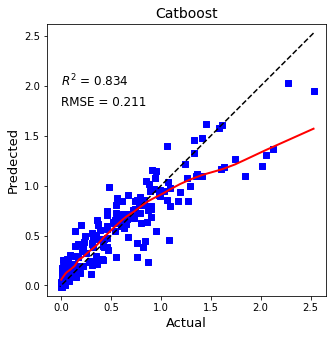

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='s', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.834', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.211', fontsize = 12)
plt.title('Catboost', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

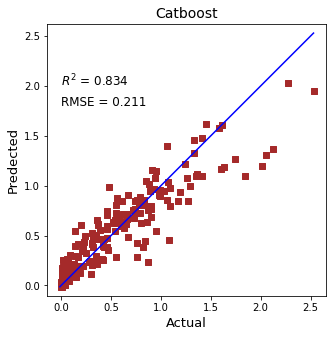

In [28]:
#Ploting The predections
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='brown', marker='s')
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue' )
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.834', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.211', fontsize = 12)
plt.title('Catboost', fontsize = 14)
plt.show()

In [29]:
sorted_feature_importance = regressor.feature_importances_.argsort()

Text(0.5, 1.0, 'CatBoost Feature Importance')

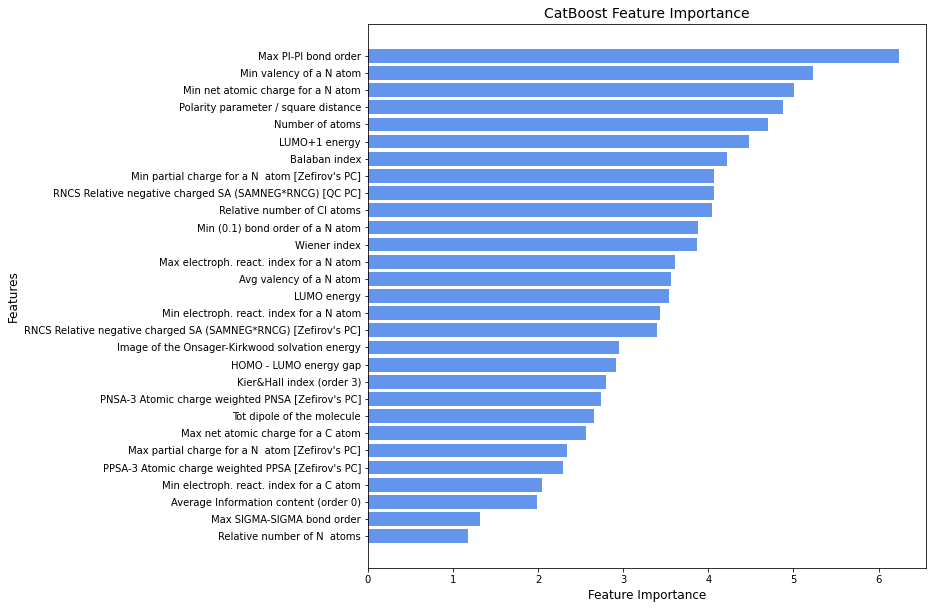

In [30]:
plt.figure(figsize=(10,10))
plt.barh(x_train.columns[sorted_feature_importance], 
        regressor.feature_importances_[sorted_feature_importance], align='center',alpha=1,
        color='cornflowerblue')
plt.xlabel("Feature Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.title('CatBoost Feature Importance', fontsize = 14)

In [31]:
import shap

In [32]:
explainer = shap.Explainer(regressor.predict, x_train)

In [33]:
shap_values = explainer(x_train)

Permutation explainer: 845it [02:04,  6.49it/s]                                                                        


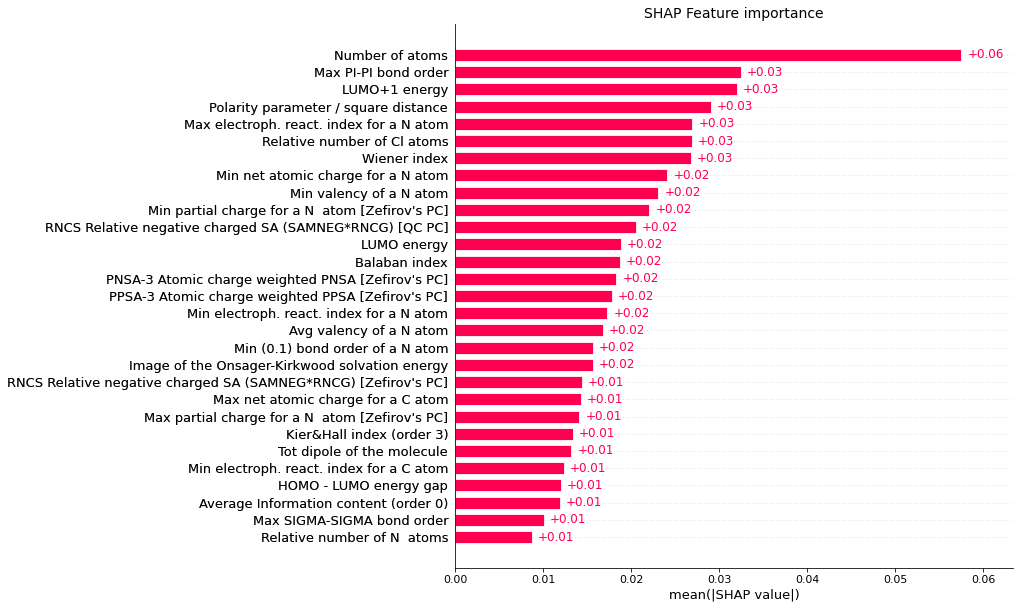

In [34]:
#feature importance 
shap.plots.bar(shap_values, max_display=29,show = False )

plt.title("SHAP Feature importance", fontsize = 14) 


plt.gcf().set_size_inches(10,10)
plt.show()

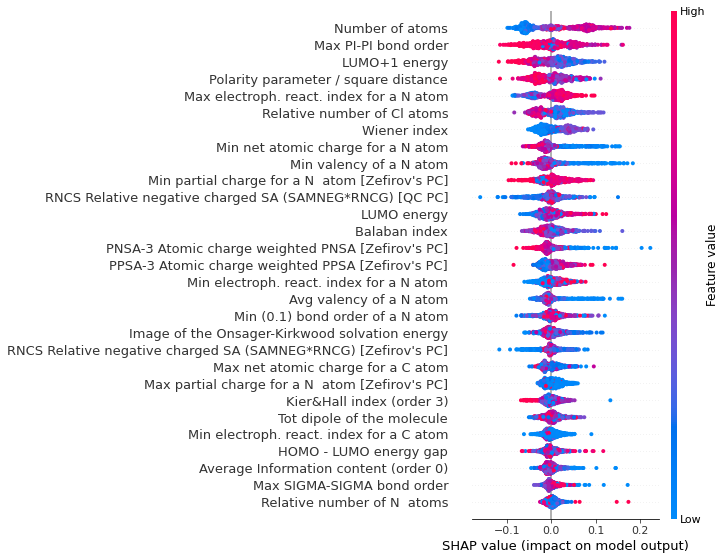

In [35]:
#summary plot (Possitivr or negative impect)
shap.summary_plot(shap_values, x_train, x.columns, show = False, plot_size=[10,7], max_display=x_train.shape[0])
plt.gcf().set_size_inches(10,8)
#to change the 'cmap = "viridis",''

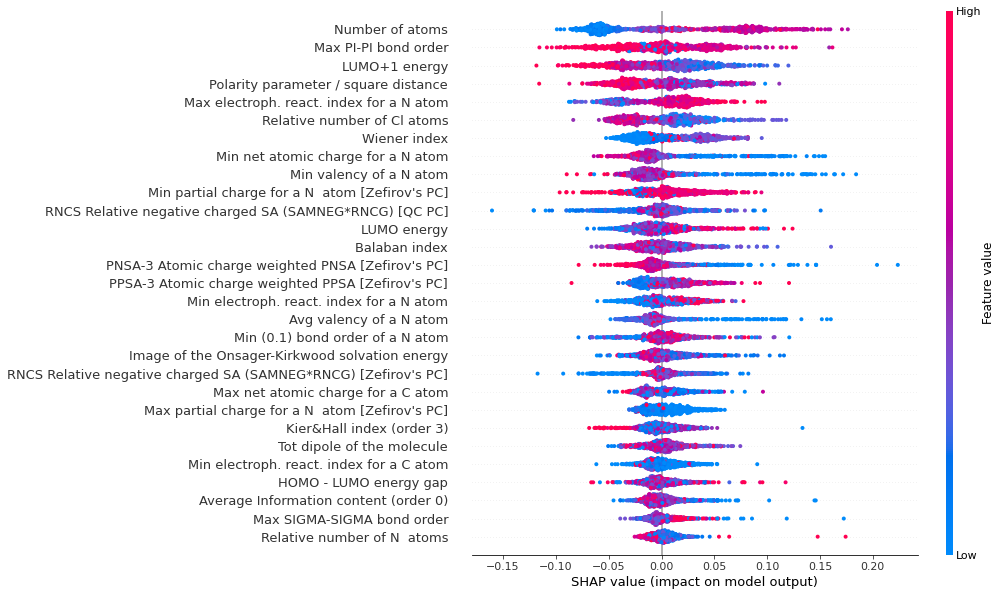

In [36]:
shap.plots.beeswarm(shap_values, show = False, plot_size=[10,10], max_display=x_train.shape[0])

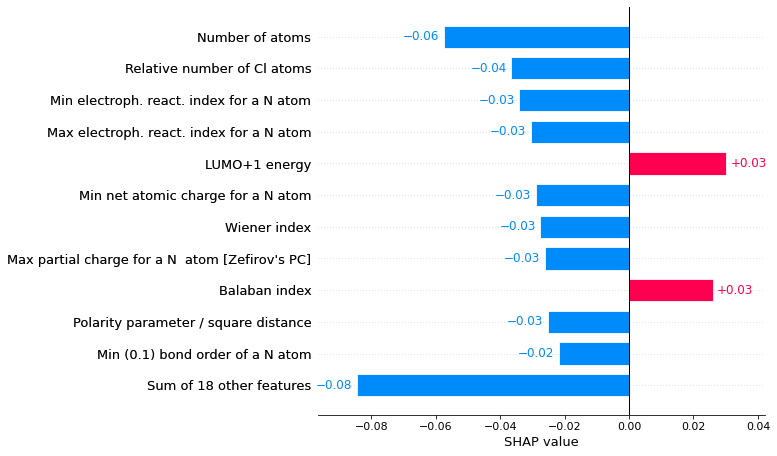

In [37]:
#Local bar plot ( to expalin the impact of single row mean single complex on the final output, Hear I Use first complex in training set )
shap.plots.bar(shap_values[0], max_display=12)

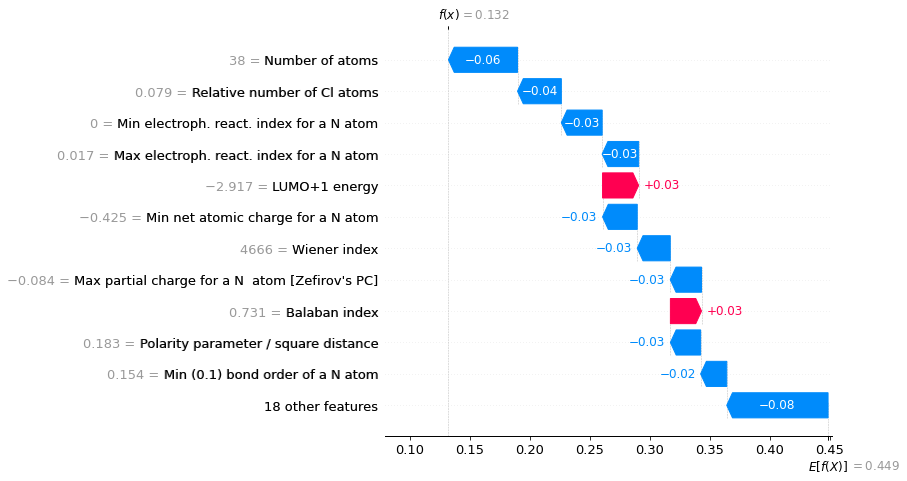

In [38]:
shap.plots.waterfall(shap_values[0], max_display=12)

Text(0.5, 1.0, 'SHAP Feature importance')

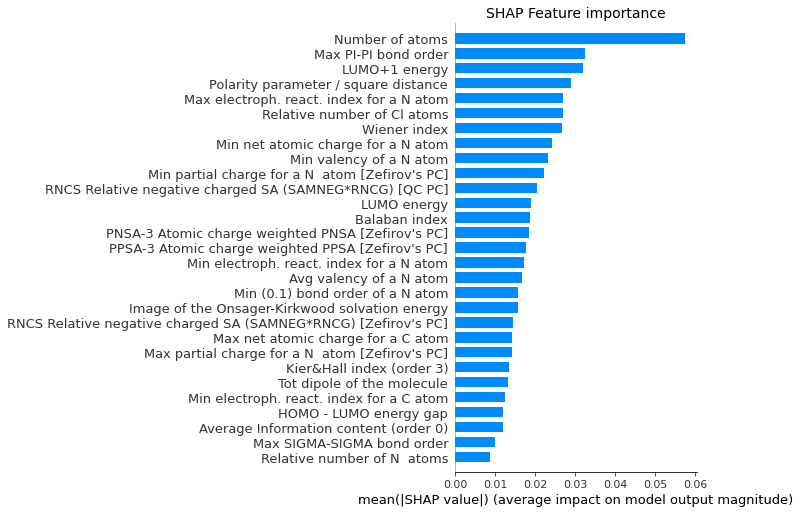

In [39]:
shap.summary_plot(shap_values, x_train,x.columns, plot_type="bar", max_display=x.shape[1], plot_size=[10,7], show = False)
plt.title("SHAP Feature importance", fontsize = 14) 

In [40]:
#For ploting the Dependency plot 
explainer = shap.Explainer(regressor)
shap_values = explainer.shap_values(x_train)

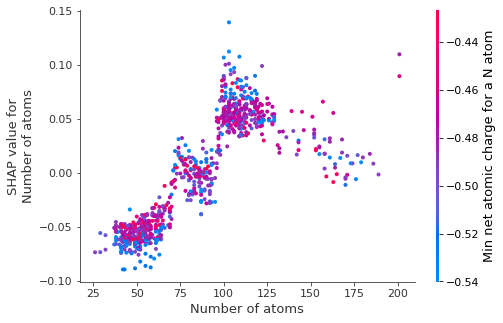

In [66]:
shap.dependence_plot("rank(0)", shap_values, x_train, x.columns, interaction_index='auto', show = False)
plot_size=[5,5]

shap.dependence_plot("Max PI-PI bond order", shap_values, x_train, x.columns, interaction_index="auto")

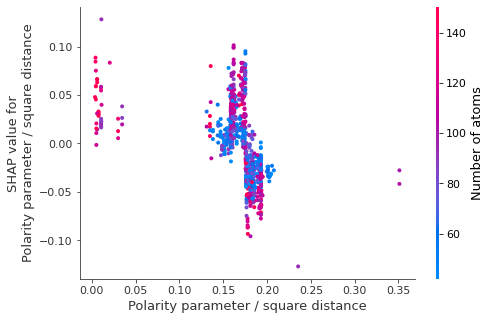

In [38]:
shap.dependence_plot("Polarity parameter / square distance", shap_values, x_train, x.columns, interaction_index='auto')

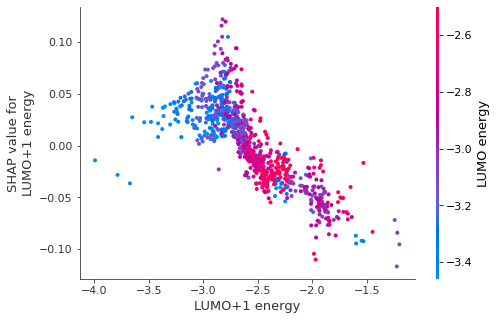

In [39]:
shap.dependence_plot("LUMO+1 energy", shap_values, x_train, x.columns, interaction_index="auto")

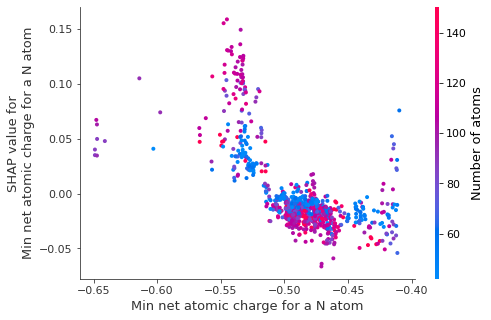

In [40]:
shap.dependence_plot("Min net atomic charge for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

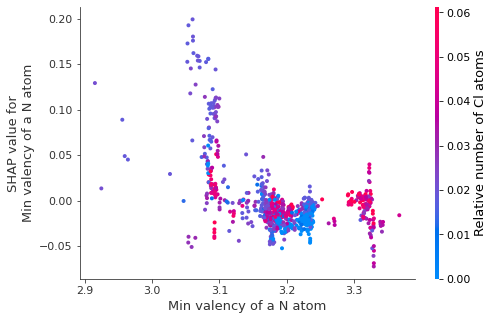

In [41]:
shap.dependence_plot("Min valency of a N atom", shap_values, x_train, x.columns, interaction_index="auto")

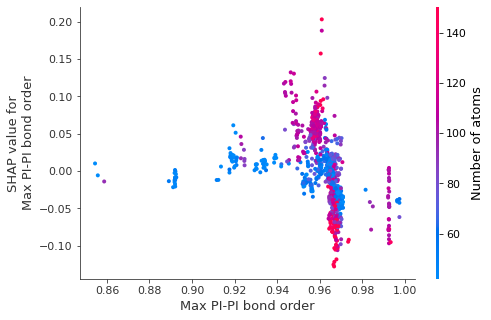

In [42]:
shap.dependence_plot("Max PI-PI bond order", shap_values, x_train, x.columns, interaction_index="auto")

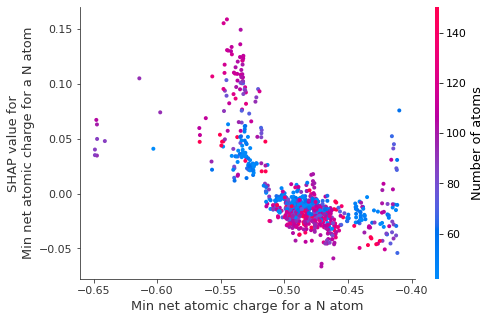

In [43]:
shap.dependence_plot("Min net atomic charge for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

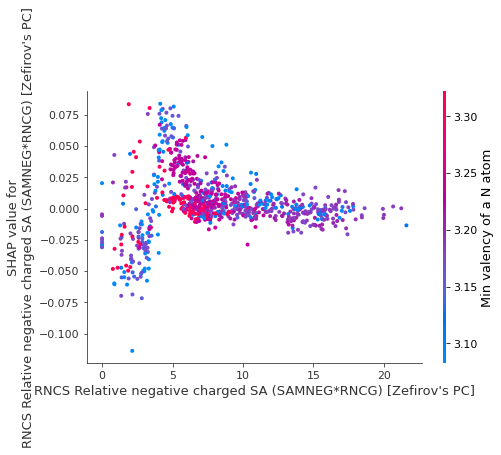

In [44]:
shap.dependence_plot("RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto")

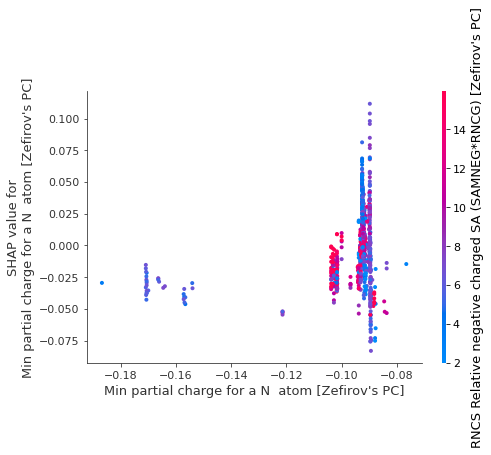

In [45]:
shap.dependence_plot("Min partial charge for a N  atom [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto") 

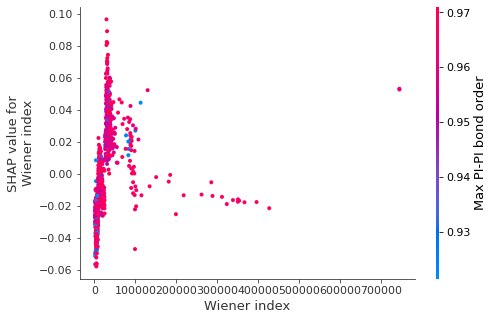

In [46]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index="auto")

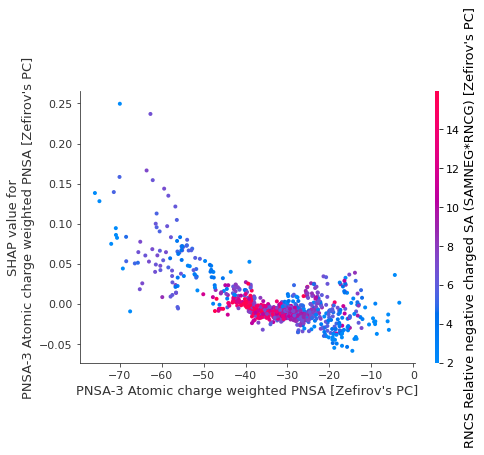

In [47]:
shap.dependence_plot("PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto")

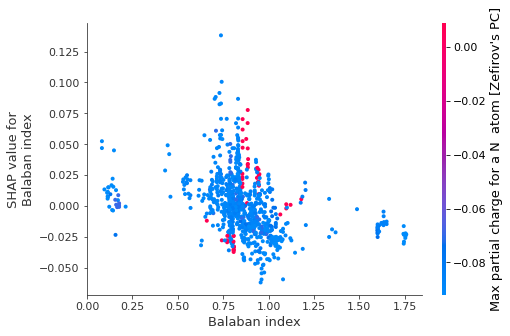

In [51]:
shap.dependence_plot("Balaban index", shap_values, x_train, x.columns, interaction_index="auto")

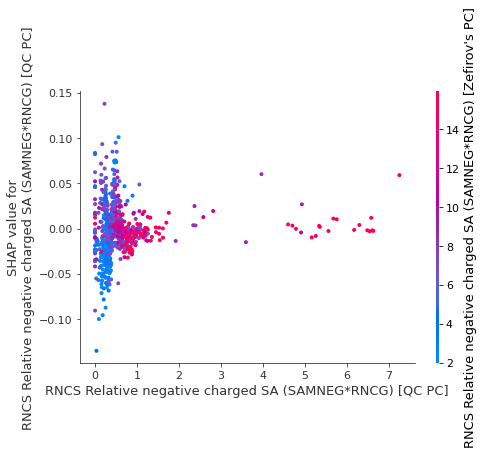

In [52]:
shap.dependence_plot("RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC]", shap_values, x_train, x.columns, interaction_index="auto")

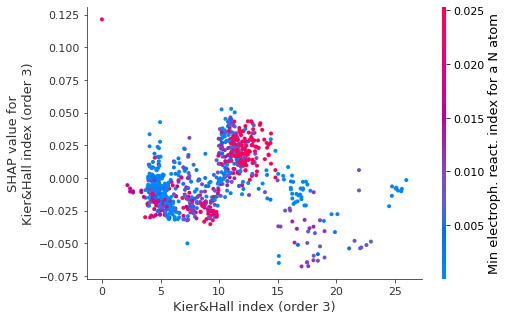

In [53]:
shap.dependence_plot("Kier&Hall index (order 3)", shap_values, x_train, x.columns, interaction_index="auto")

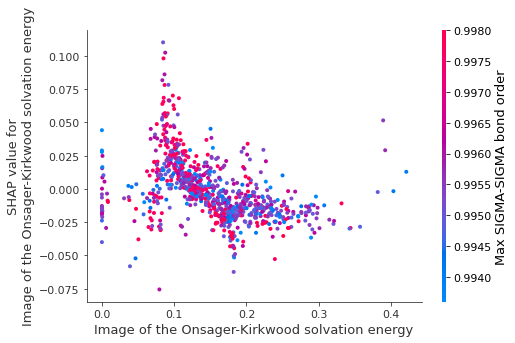

In [54]:
shap.dependence_plot("Image of the Onsager-Kirkwood solvation energy", shap_values, x_train, x.columns, interaction_index="auto")

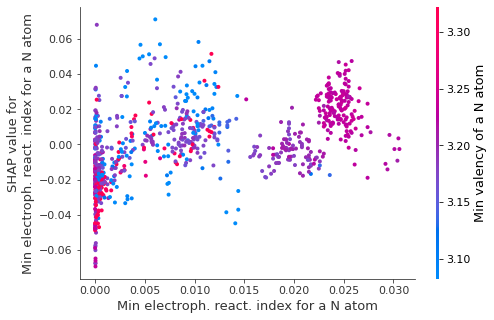

In [60]:
shap.dependence_plot("Min electroph. react. index for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

In [52]:
shap.force_plot(shap_explainer_values)

In [53]:
shap.force_plot(shap_explainer_values[10,:] ,  x_train, x.columns)

In [54]:
np.random.seed(2021)
random_mask = np.random.choice(a=[0,1], size=y_train.shape, p=[0.9,0.1])
shap.force_plot(explainer.expected_value, pd.DataFrame(shap_values)[random_mask == 1].values, x_train[random_mask == 1])

In [55]:
regressor1 = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [ ]:
regressor_grid = GridSearchCV(estimator =regressor1, param_grid=grid,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [ ]:
regressor_grid.fit (x_train, y_train)

In [ ]:
regressor_grid.best_params_

In [ ]:
regressor_grid.best_score_

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
PartialDependenceDisplay.from_estimator(regressor, x_train, features, target=0)

In [ ]:
shap.plots.waterfall(shap_values[x_train])